# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import scipy.stats as st
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_auc_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_style("whitegrid")

# Reading the file

In [2]:
df=pd.read_csv('C:\\Users\\This PC\\Downloads\\capstone project\\diabetic_data.csv')
df.head(10)

encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   
5                 3          ?                         ?                  31   
6                 4          ?                         ?                  70   
7                 5          ?                         ?                  73   
8                13          ?                         ?                  68   
9                12          ?          InternalMedicine                  33   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   
5               6               16                  0                 0   
6               1               21                  0                 0   
7               0               12                  0                 0   
8               2               28                  0                 0   
9               3               18                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1          None   
1                 0     276  250.01    255                 9          None   
2                 1     648     250    V27                 6          None   
3                 0       8  250.43    403                 7          None   
4                 0     197     157    250                 5          None   
5                 0     414     411    250                 9          None   
6                 0     414     411    V45                 7          None   
7                 0     428     492    250                 8          None 

#checking its shape

In [3]:
df.shape

(101766, 50)

In [4]:
df['readmitted'].value_counts()            #checking for counts in classes in the target variable

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [5]:
df[df.duplicated()]                                     #checking for duplicates in dataset

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

In [6]:
df[~df.applymap(np.isreal).all(1)]              #checking for nonreal values in dataset

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code         medical_specialty  \
0                      1          ?  Pediatrics-Endocrinology   
1                      3          ?                         ?   
2                      2          ?                         ?   
3                      2          ?                         ?   
4                      1          ?                         ?   
...                  ...        ...                       ...   
101761                 3         MC                         ?   
101762                 5         MC                         ?   
101763                 1         MC                         ?   
101764                10         MC           Surgery-General   
101765                 6          ?                         ?   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  \
0                       0                 0                 0  250.83       ?   
1                       0                 0                 0     276  250.01   
2                       2                 0                 1     648     250   
3                       0                 0                 0       8  250.43   
4                       0                 0                 0     197     157   
...                   ...               ...               ...     ...     ...   
101761                  0                 0          

In [7]:
df.replace('?',np.nan,inplace=True)             #replacing '?' with null

In [8]:
df.isnull().sum()*100/len(df)              #checking null values

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [9]:
df1=df.drop(['weight','payer_code'],axis=1)          #drop weight and payer code because they had high per of null values
                                            #we r not dropping medical_speciality as it can be helpful in furthur analysis

In [10]:
df1['medical_specialty'].fillna('missing',inplace=True)   #replacing null values in medical speciality

In [11]:
df1['readmitted'].value_counts()*100/len(df1['readmitted'])    #target feature is evenly distributed

NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64

# Null Value Analysis

In [12]:
df1.isna().sum()*100/len(df1)

encounter_id                0.000000
patient_nbr                 0.000000
race                        2.233555
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
medical_specialty           0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351787
diag_3                      1.398306
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
a

In [13]:
df1.dropna(axis=0,inplace=True,subset=['race'])     #drop null records as it is low in percentage

In [14]:
df1.dropna(axis=0,inplace=True,subset=['diag_3'])  #drop null records as it is low in percentage

In [15]:
df1.dropna(axis=0,inplace=True,subset=['diag_1','diag_2'])  #drop null records as it is low in percentage

In [16]:
df1.isna().sum()                                #again checking for null values

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [17]:
df1.shape             #checking for final shape

(98053, 48)

In [18]:
df1.dtypes              #datatypes are right

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

### Changing Class Distribution

In [19]:
df1['readmitted']=df1['readmitted'].replace({'>30':'Yes','<30':'Yes'})   #making target binary class

In [20]:

df1['discharge_disposition_id'] = df1['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

df1 = df1[~df1.discharge_disposition_id.isin([11,13,14,19,20,21])]

df1['admission_type_id'] = df1['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

df1['admission_source_id'] = df1['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

In [21]:
#replacing diagnosis class codes with the respective diseases

In [22]:
df1['diag_1'] = df1['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [23]:

df1['diag_2'] = df1['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [24]:

df1['diag_3'] = df1['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [25]:
#merging medical speciality into confined classes

In [26]:
df1.medical_specialty.unique()

array(['missing', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Otolaryngology', 'Pediatrics-Endocrinology',
       'Surgery-Colon&Rectal', 'Endocrinology', 'Hematology/Oncology',
       'Urology', 'Pediatrics-CriticalCare',
       'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Podiatry', 'Gynecology',
       'Oncology', 'Pediatrics-Neurology', 'Surgery-Plastic',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Psychology', 'Ophthalmology', 'Surgery-Pediatric',
       'PhysicalMedicineandRehabilitation', 'InfectiousDisease

In [27]:
pediatrics = ['Pediatrics','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology',
               'Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric',
             'Pediatrics-Pulmonolog','Pediatrics-InfectiousDiseases','Pediatrics-AllergyandImmunology']

psychic = ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath'
          ]


neurology = ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology']


surgery = ['Surgeon', 'Surgery-Cardiovascular',  'Surgery-General','Surgery-Maxillofacial',
          'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 
             'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic',
             'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry']
             
ungrouped = ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases',
           'Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology','Radiologist','Proctology','Dermatology','SportsMedicine','Speech','Perinatology'
                ,'Resident','Dentistry','DCPTEAM',
                'AllergyandImmunology','Anesthesiology','Pathology',
                'Endocrinology-Metabolism','PhysicianNotFound','OutreachServices',
                'Rheumatology','Obstetrics','Obsterics&Gynecology-GynecologicOnco','InternalMedicine', 'Family/GeneralPractice', 'Cardiology'
                 ,'Orthopedics-Reconstructive', 
                 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Nephrology','Orthopedics','missing']

In [28]:
l=[]
for i in df1['medical_specialty']:
    if i in surgery:
        l.append('Surgery')
    elif i in neurology:
        l.append('Neurology')
    elif i in psychic:
        l.append('Psychic')
    elif i in pediatrics:
        l.append('Pediatrics')
    else:
        l.append('Other')

In [29]:
df1['medical_specialty']=l

In [30]:
df1.head()

encounter_id  patient_nbr             race  gender      age  \
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   
5         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  1                         1                    1   

   time_in_hospital medical_specialty  num_lab_procedures  num_procedures  \
1                 3             Other                  59               0   
2                 2             Other                  11               5   
3                 2             Other                  44               1   
4                 1             Other                  51               0   
5                 3             Other                  31               6   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
1               18                  0                 0                 0   
2               13                  2                 0                 1   
3               16                  0                 0                 0   
4                8                  0                 0                 0   
5               16                  0                 0                 0   

        diag_1       diag_2       diag_3  number_diagnoses max_glu_serum  \
1        other     diabetes        other                 9          None   
2     pregnecy     diabetes        other                 6          None   
3        other     diabetes  circulatory                 7          None   
4    neoplasms    neoplasms     diabetes                 5          None   
5  circulatory  circulatory     diabetes                 9          None   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
1      None        No          No          No             No          No   
2      None        No          No          No             No          No   
3      None        No          No          No             No          No   
4      None        No          No          No             No          No   
5      None        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   
5            No        No        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   
5       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4                  No                  No                       No   
5                  No                  No                       No   

In [31]:
df1['readmitted'].value_counts(normalize=True)          #distribution is almost same

NO     0.52596
Yes    0.47404
Name: readmitted, dtype: float64

### Checking Outliers

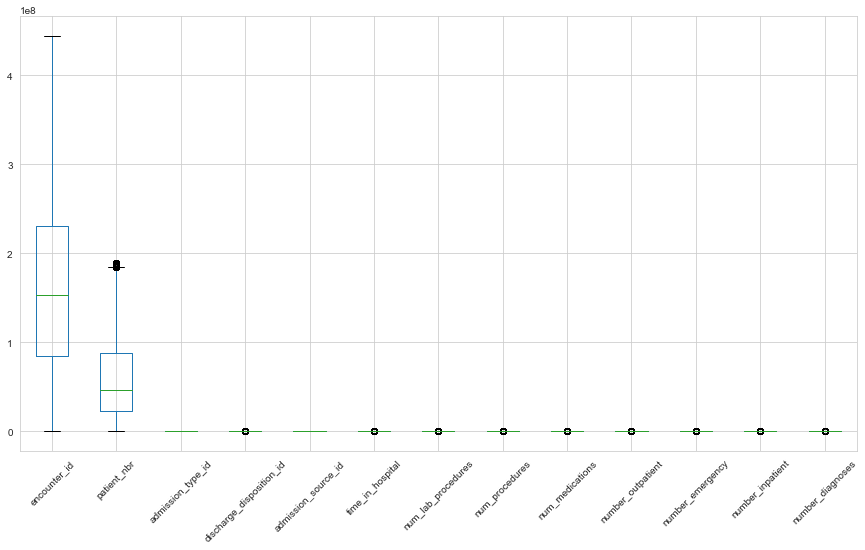

In [32]:
df1.plot.box(figsize=(15,8))
plt.xticks(rotation=45)
plt.show()                                            #checking for outliers

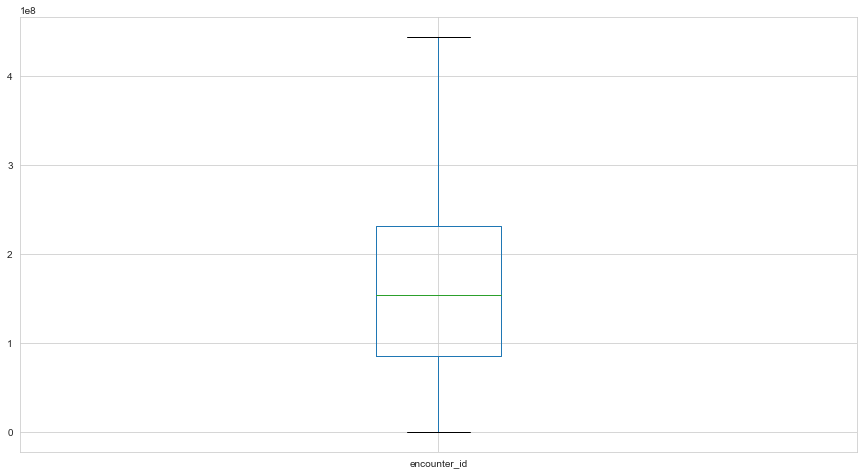

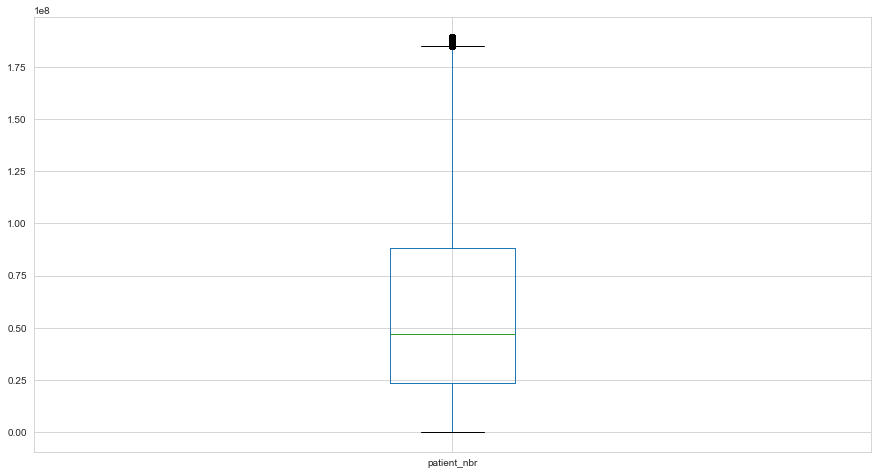

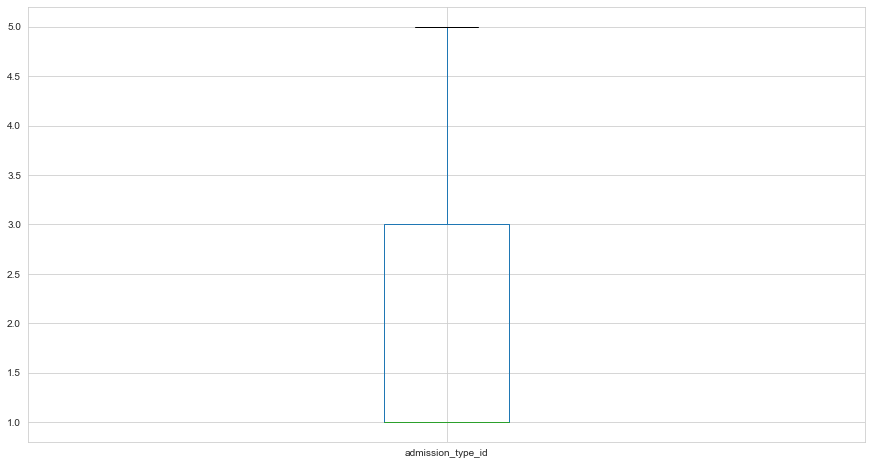

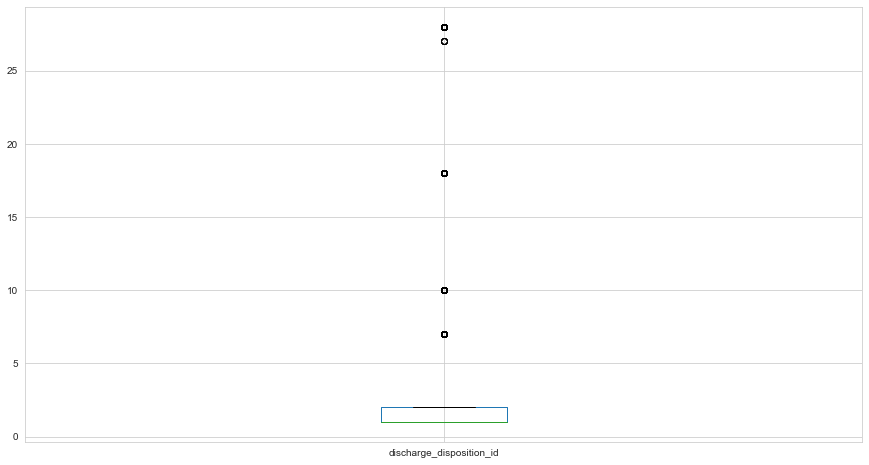

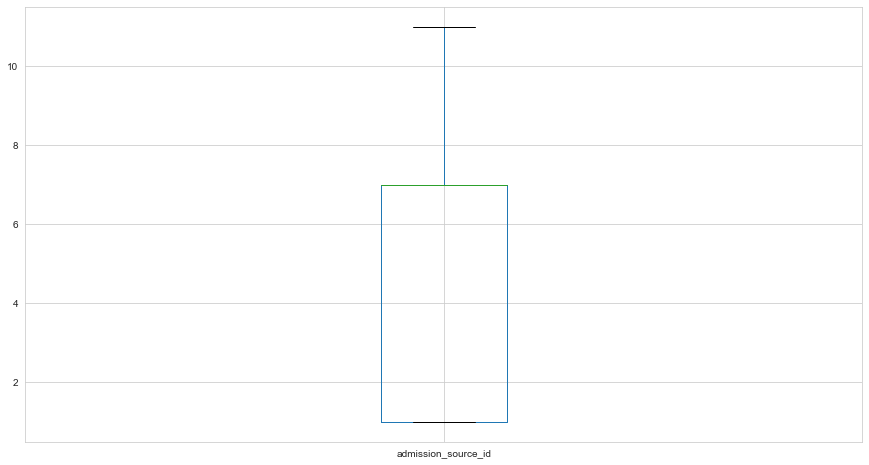

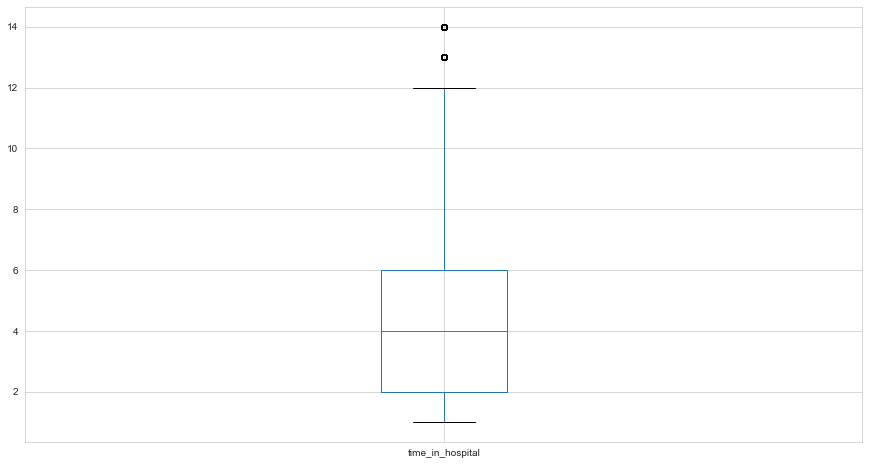

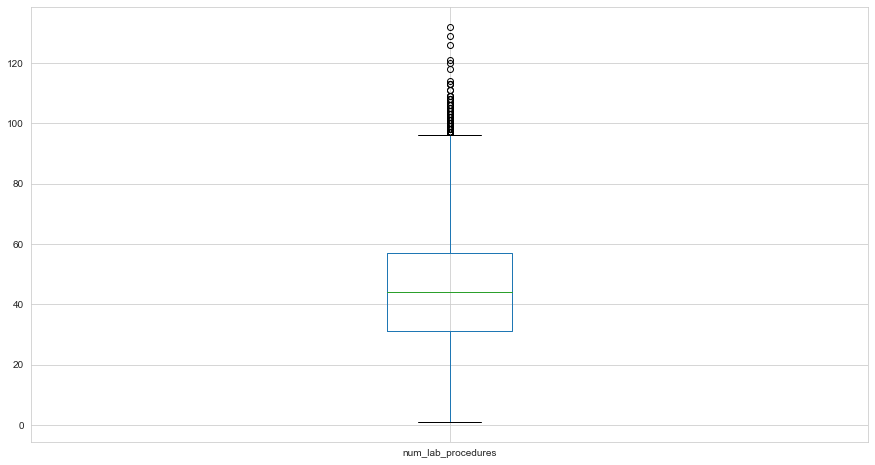

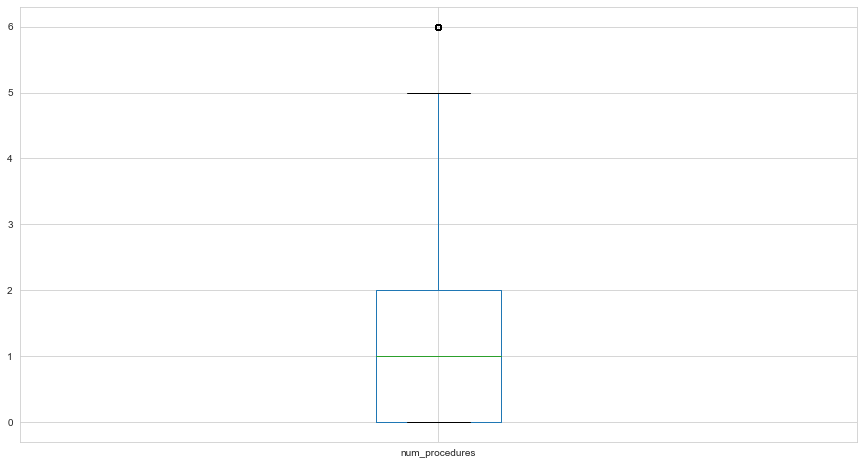

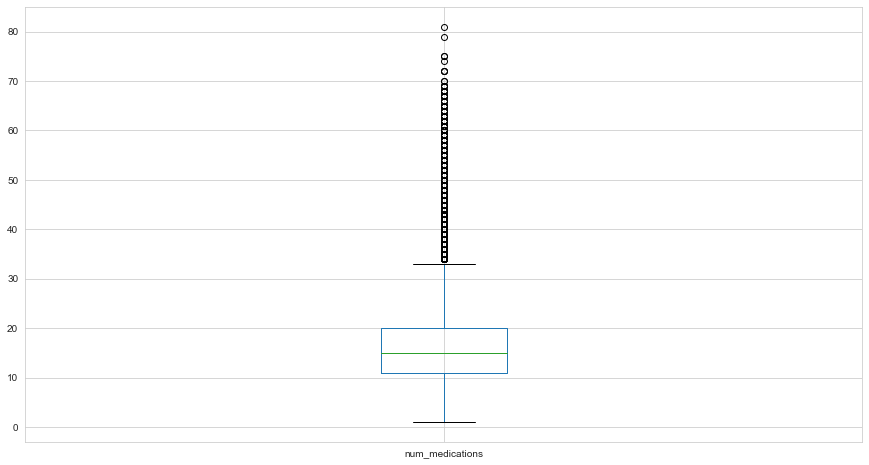

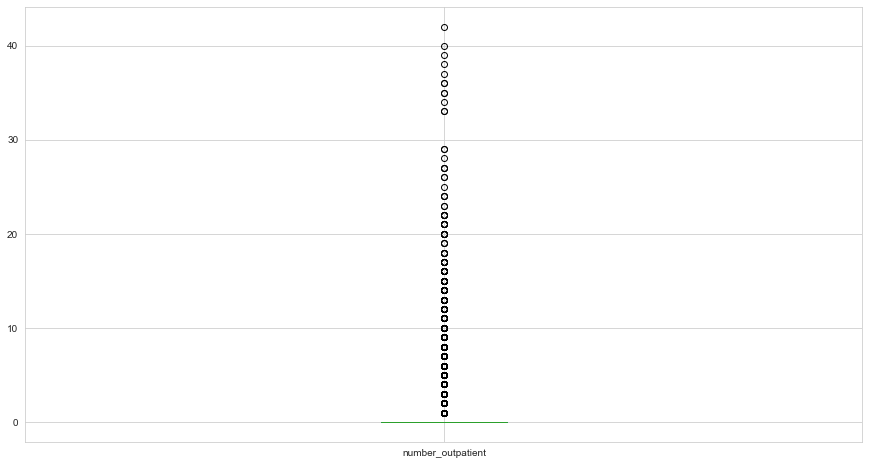

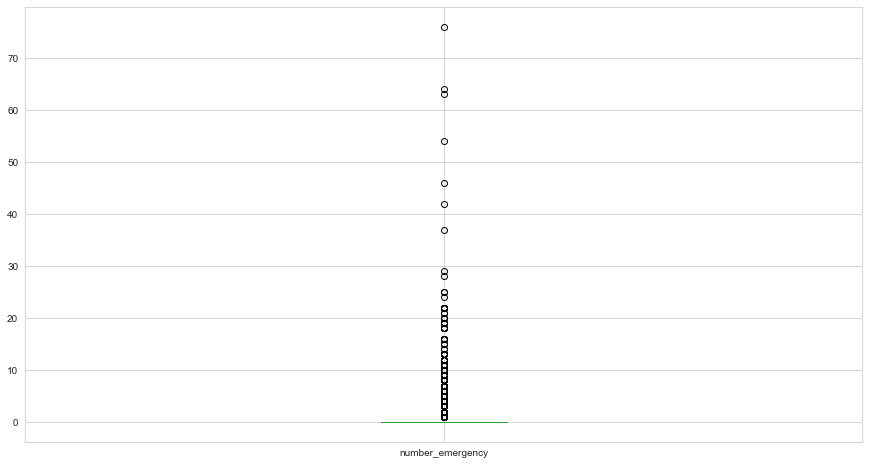

In [33]:
for i in df1.loc[:,df.dtypes!=np.object]:
    df1[i].plot.box(figsize=(15,8))           
    plt.show()

In [34]:
#there are outliers in data but we must analysis further before removing them

In [35]:
df1.skew()       #checking the skewness #number_emergency is highly skewed feature

encounter_id                 0.690388
patient_nbr                  0.448375
admission_type_id            1.434163
discharge_disposition_id     4.100025
admission_source_id         -0.588209
time_in_hospital             1.127523
num_lab_procedures          -0.240563
num_procedures               1.313351
num_medications              1.339284
number_outpatient            8.767193
number_emergency            22.695468
number_inpatient             3.566297
number_diagnoses            -0.807601
dtype: float64

In [36]:
pt=PowerTransformer()
ss=StandardScaler()

## Visualization

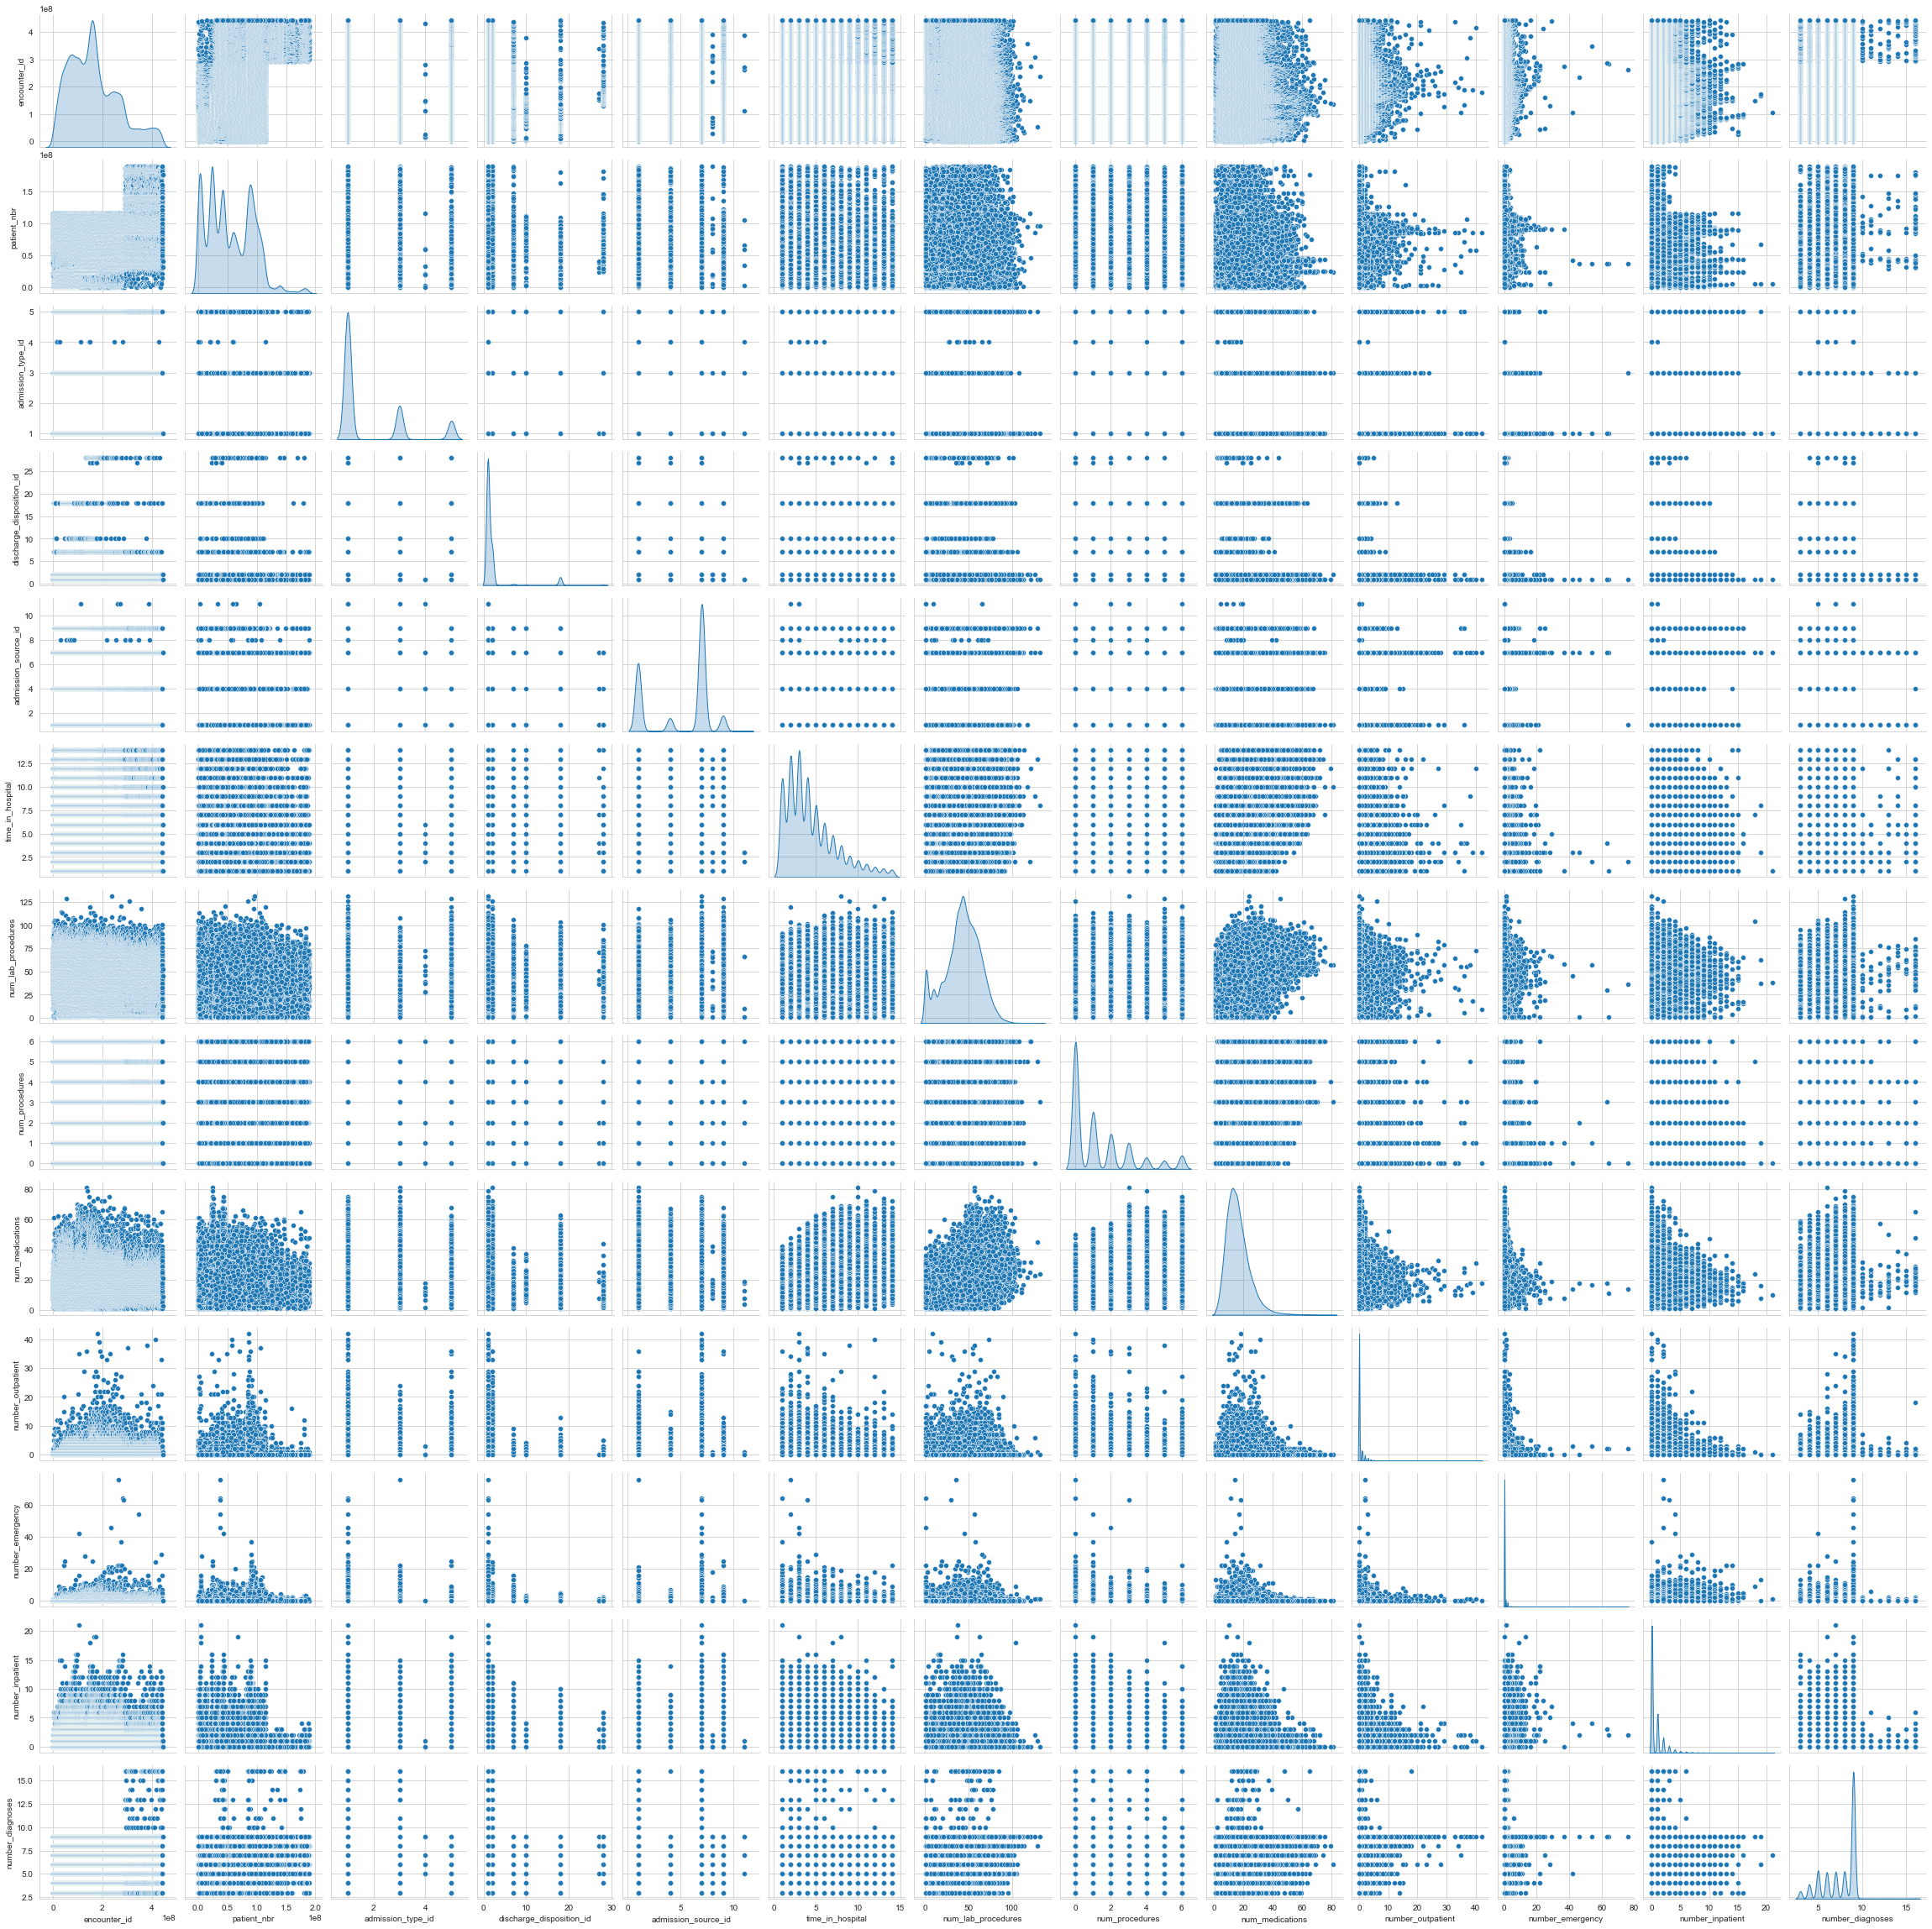

In [37]:
sns.pairplot(df1,diag_kind='kde')                 #plotting pairplot for identifying relation between numericla features
plt.show()

Inferences:
1. mostly numerical features r not showing much correlation
2. mostly features are rightly skewed 
3. there can be a corelation between num_medication and num_lab procedures

In [38]:
#separating numerical and categorical data for visualization

In [39]:
num=df1.loc[:,df1.dtypes!=np.object]    
num

encounter_id  patient_nbr  admission_type_id  \
1             149190     55629189                  1   
2              64410     86047875                  1   
3             500364     82442376                  1   
4              16680     42519267                  1   
5              35754     82637451                  1   
...              ...          ...                ...   
101761     443847548    100162476                  1   
101762     443847782     74694222                  1   
101763     443854148     41088789                  1   
101764     443857166     31693671                  1   
101765     443867222    175429310                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    1                 3   
...                          ...                  ...               ...   
101761                         2                    7                 3   
101762                         2                    4                 5   
101763                         1                    7                 1   
101764                         2                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  \
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
5                       31               6               16   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  \
1                       0                 0                 0   
2                       2                 0                 1   
3                       0                 0                 0   
4                       0                 0                 0   
5                       0                 0                 0   
...                   ...               ...               ...   
101761                  0                 0                 0   
101762                  0                 0                 1   
101763                  1                 0                 0   
101764                  0                 0                 1   
101765                  0                 0                 0   

        number_diagnoses  
1                      9  
2                      6  
3                      7  
4                      5  
5                      9  
...                  ...  
101761                 9  
101762                 9  
101763                13  
101764                 9  
101765                 9  

[96437 rows x 13 columns]

In [40]:
cat=df1.loc[:,df1.dtypes==np.object]
cat

race  gender      age medical_specialty       diag_1  \
1             Caucasian  Female  [10-20)             Other        other   
2       AfricanAmerican  Female  [20-30)             Other     pregnecy   
3             Caucasian    Male  [30-40)             Other        other   
4             Caucasian    Male  [40-50)             Other    neoplasms   
5             Caucasian    Male  [50-60)             Other  circulatory   
...                 ...     ...      ...               ...          ...   
101761  AfricanAmerican    Male  [70-80)             Other     diabetes   
101762  AfricanAmerican  Female  [80-90)             Other    digestive   
101763        Caucasian    Male  [70-80)             Other        other   
101764        Caucasian  Female  [80-90)           Surgery       injury   
101765        Caucasian    Male  [70-80)             Other    digestive   

               diag_2       diag_3 max_glu_serum A1Cresult metformin  \
1            diabetes        other          None      None        No   
2            diabetes        other          None      None        No   
3            diabetes  circulatory          None      None        No   
4           neoplasms     diabetes          None      None        No   
5         circulatory     diabetes          None      None        No   
...               ...          ...           ...       ...       ...   
101761          other  circulatory          None        >8    Steady   
101762          other    digestive          None      None        No   
101763  genitourinary        other          None      None    Steady   
101764          other       injury          None      None        No   
101765      digestive    digestive          None      None        No   

       repaglinide nateglinide chlorpropamide glimepiride acetohexamide  \
1               No          No             No          No            No   
2               No          No             No          No            No   
3               No          No             No          No            No   
4               No          No             No          No            No   
5               No          No             No          No            No   
...            ...         ...            ...         ...           ...   
101761          No          No             No          No            No   
101762          No          No             No          No            No   
101763          No          No             No          No            No   
101764          No          No             No          No            No   
101765          No          No             No          No            No   

       glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose  \
1             No        No          No           No            No       No   
2         Steady        No          No           No            No       No   
3             No        No          No           No            No       No   
4         Steady        No          No           No            No       No   
5             No        No          No           No            No       No   
...          ...       ...         ...          ...           ...      ...   
101761        No        No          No           No            No       No   
101762        No        No          No           No            No       No   
101763        No        No          No           No            No       No   
101764    Steady        No          No       Steady            No       No   
101765        No        No          No           No            No       No   

       miglitol troglitazone tolazamide examide citoglipton insulin  \
1            No           No         No      No          No      Up   
2            No           No         No      No          No      No   
3            No           No         No      No          No      Up   
4            No           No         No      No          No  Steady   
5            No           No         No      No          No 

### Univariate analysis

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['race'])
plt.subplot(1,2,2)
df1['race'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45)   
plt.show()                             

Caucasion race is in majority

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['gender'])
plt.subplot(1,2,2)
df1['gender'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45)
plt.show()                      

Females are slighlty more than  males

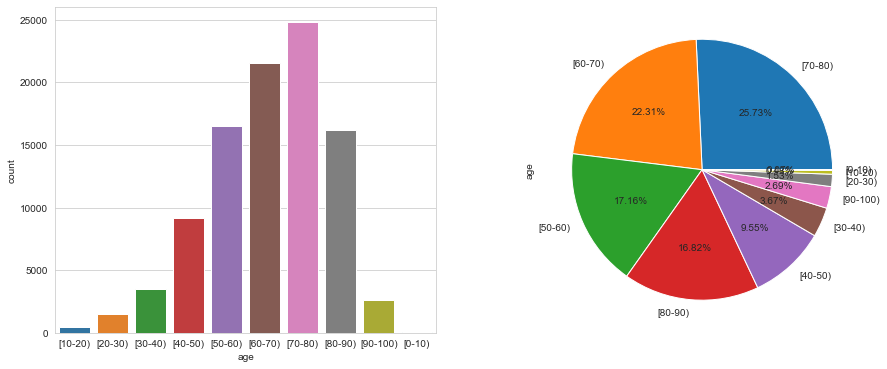

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['age'])
plt.subplot(1,2,2)
df1['age'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45)    
plt.show()                      

Ages from 50 to 80 are more in dataset

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df1['medical_specialty'])
plt.xticks(rotation=90)
plt.show()           

Mixed speciality values are more,Surgery are second most popular medical_speciality

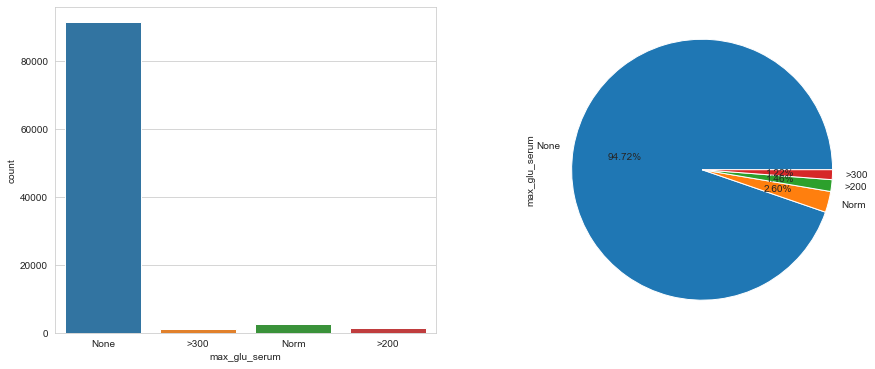

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['max_glu_serum'])
plt.subplot(1,2,2)
df1['max_glu_serum'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45) 
plt.show()                            

None is more ,that is more values are not measured#,second most measured class is 'Norm'

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['A1Cresult'])
plt.subplot(1,2,2)
df1['A1Cresult'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45) 
plt.show()      

not measured is more,second most measured class is '>8'

In [47]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['diag_1'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
df1['diag_1'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45) 
plt.show()                            

Majority of patients suffering from circulatory diseases in primary diagonasis

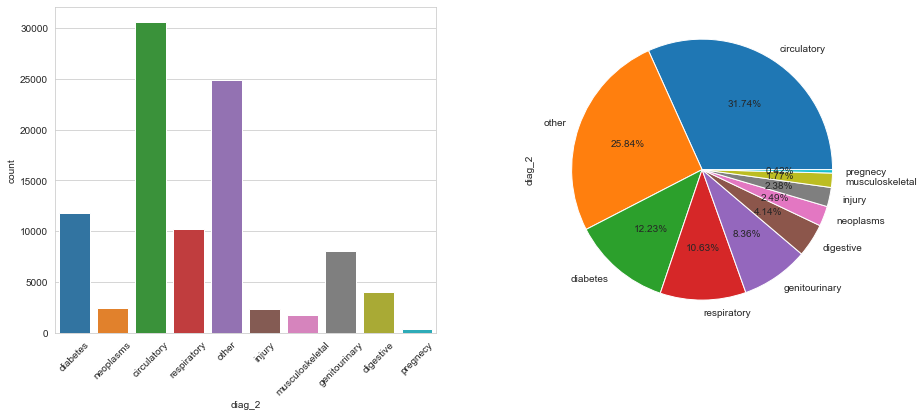

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['diag_2'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
df1['diag_2'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45) 
plt.show()                                            

In secondary diagonosis also circulatory diseases are in majority

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df1['diag_3'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
df1['diag_3'].value_counts().plot.pie(autopct="%0.2f%%")
plt.xticks(rotation=45) 
plt.show()                                          

In final diagonosis circulatory diagonsis is in majority

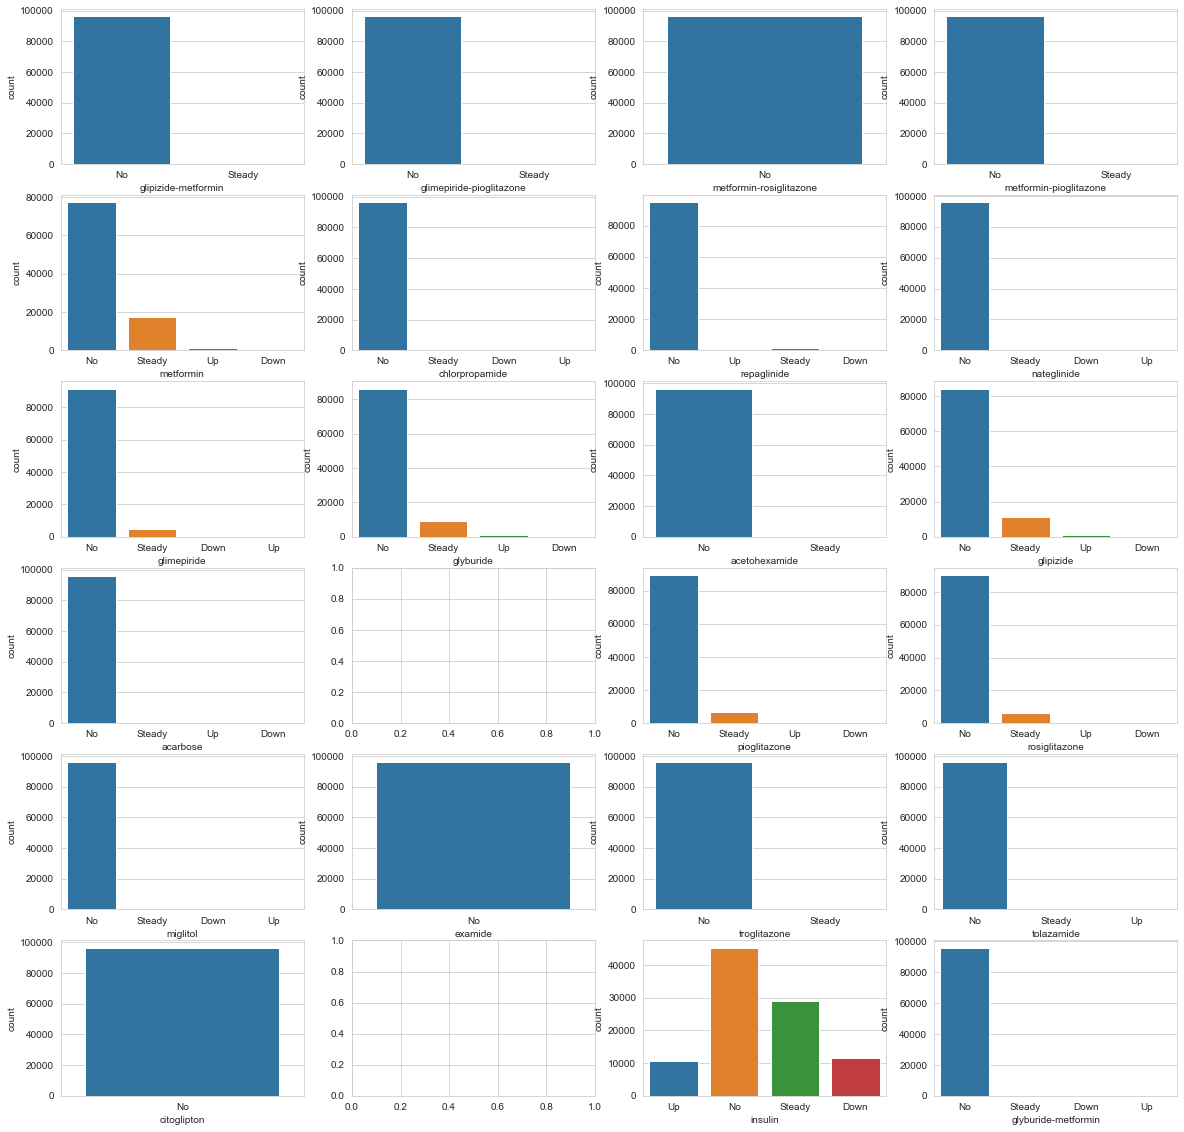

In [50]:
fig,ax=plt.subplots(6,4,figsize=(20,20))
sns.countplot(df1['metformin'],ax=ax[1,0])
sns.countplot(df1['repaglinide'],ax=ax[1,2])
sns.countplot(df1['nateglinide'],ax=ax[1,3])
sns.countplot(df1['chlorpropamide'],ax=ax[1,1])
sns.countplot(df1['glimepiride'],ax=ax[2,0])
sns.countplot(df1['acetohexamide'],ax=ax[2,2])
sns.countplot(df1['glipizide'],ax=ax[2,3])
sns.countplot(df1['glyburide'],ax=ax[2,1])
sns.countplot(df1['tolbutamide'],ax=ax[3,0])
sns.countplot(df1['pioglitazone'],ax=ax[3,2])
sns.countplot(df1['rosiglitazone'],ax=ax[3,3])
sns.countplot(df1['acarbose'],ax=ax[3,0])
sns.countplot(df1['miglitol'],ax=ax[4,0])
sns.countplot(df1['troglitazone'],ax=ax[4,2])
sns.countplot(df1['tolazamide'],ax=ax[4,3])
sns.countplot(df1['examide'],ax=ax[4,1])
sns.countplot(df1['citoglipton'],ax=ax[5,0])
sns.countplot(df1['insulin'],ax=ax[5,2])
sns.countplot(df1['glyburide-metformin'],ax=ax[5,3])
sns.countplot(df1['glipizide-metformin'],ax=ax[0,0])
sns.countplot(df1['glimepiride-pioglitazone'],ax=ax[0,1])
sns.countplot(df1['metformin-rosiglitazone'],ax=ax[0,2])
sns.countplot(df1['metformin-pioglitazone'],ax=ax[0,3])      
plt.show()

Mostly time drug wasnot prescribed except insulin which is prescribed many time ,other drugs were not prescribed

In [51]:
sns.countplot(df1['change'])
plt.show()
sns.countplot(df1['diabetesMed'])
plt.show()                                

Most of the time no change in medication is done,also medicatation is provided to most of the people

In [52]:
#plotting numerical columns

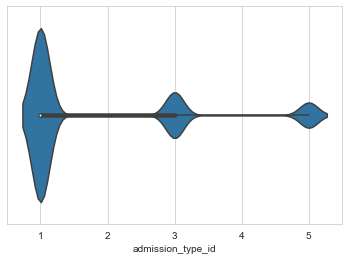

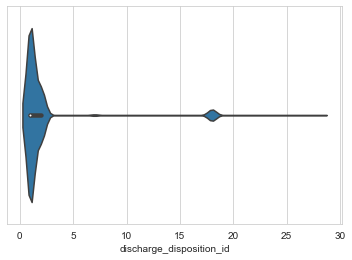

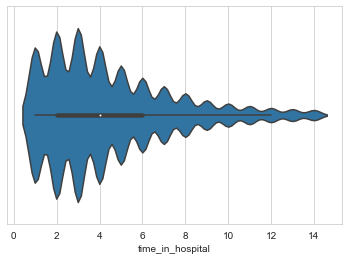

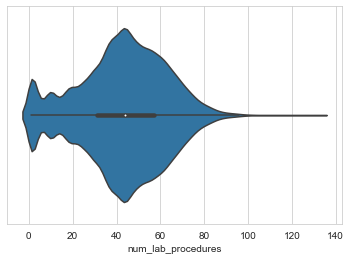

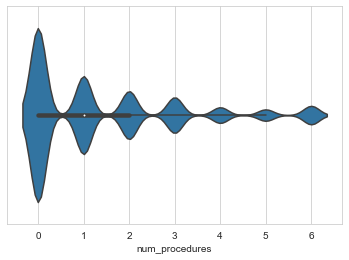

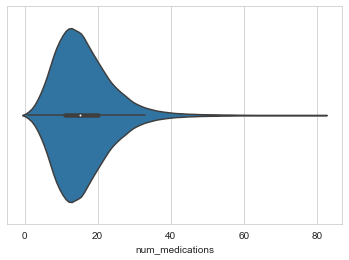

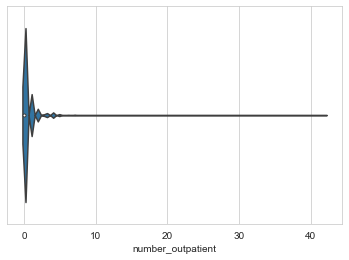

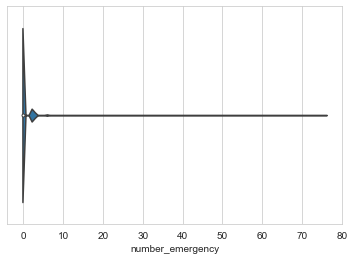

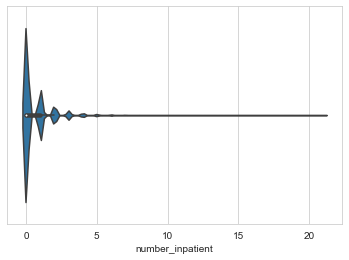

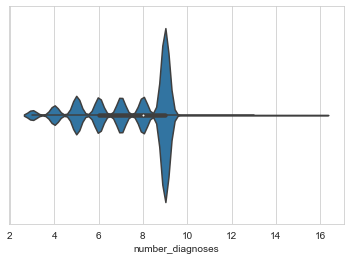

In [53]:
for i in num.columns[2:]:
    sns.violinplot(num[i])        #encounter_id,patient_nbr features are not considered
    plt.show()

Inferences:-
1. time_in_hospital for most patients is under 5 days
2. no_of_lab_procedures for most patients is 50
3. no_of_procedures other than lab procedures for most patients is zero
4. mostly patients have to go through num_medications is 10
5. no of inpatient and outpatient visits are zero,that means mostly people dont prefer recheck
6. no_diagonosis for most people is around 9
7. number_emergency,number_outpatient are highly right skewed
8. num_lab_procedures,number_diagnoses are bit left skewed
9. outliers also have a decent distribution so before removing them,we need domain expert opinion 

In [54]:
#Bivariate Analysis

In [55]:
#plotting numerical values

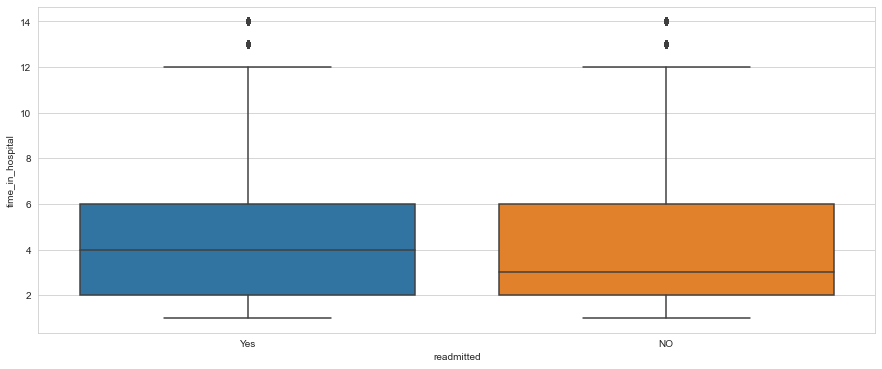

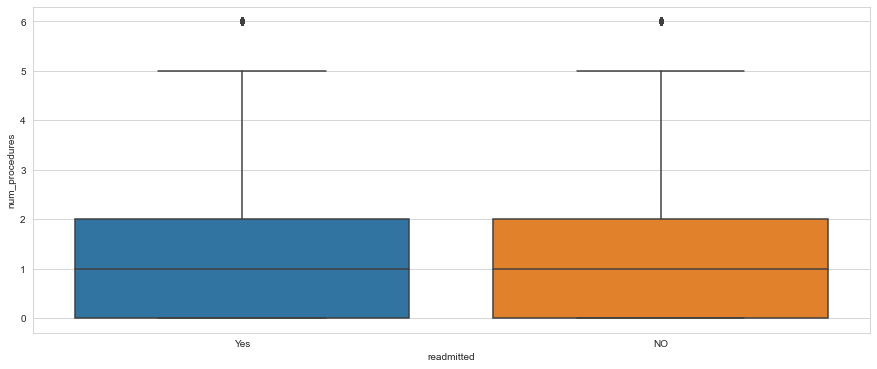

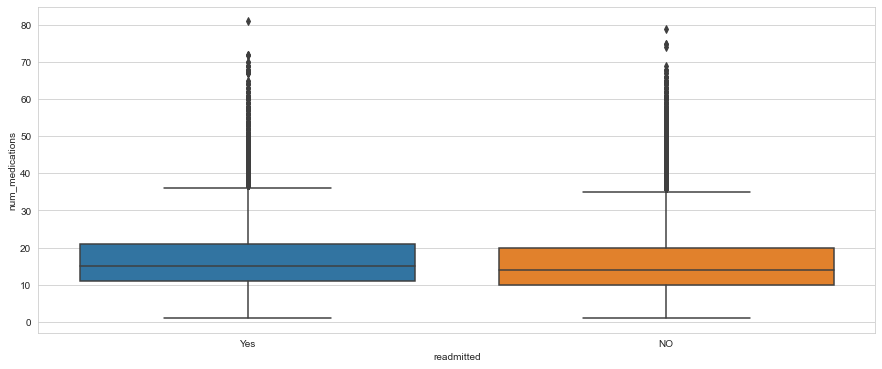

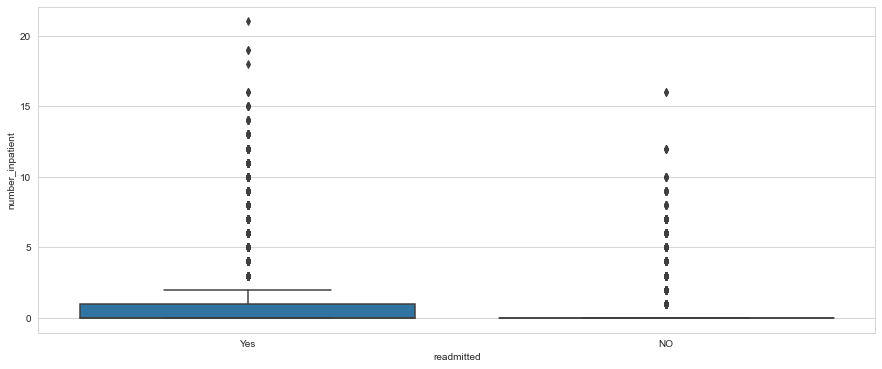

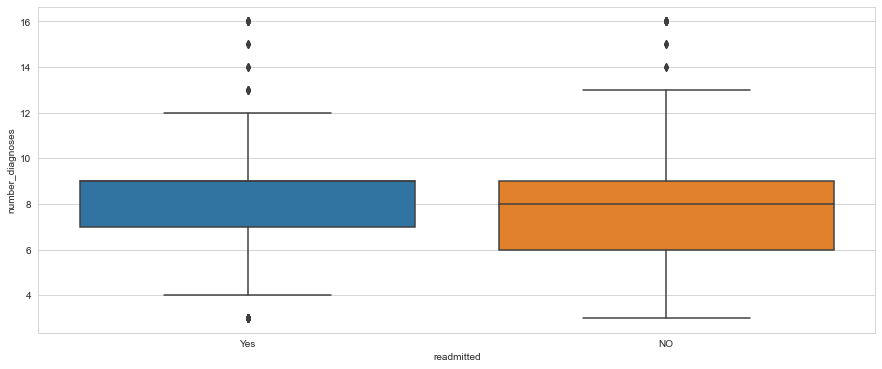

In [56]:
for i in num.columns[5:]:
    plt.figure(figsize=(15,6))
    sns.boxplot(cat['readmitted'],num[i])
    plt.show()

Inferences:-
1. time spend in hospital is slightly impacting readmission rate,readmidting people are having slighlty more time in hospital
2. no_of_lab_procedures in hospital is not impacting readmission rate 
3. more the no_of_procedures apart from lab_procedures,is not impacting readmission rate 
4. no_of_medication is also not helping in reducing readmission rate,although there is slight variation
5. no_of_outpatient visit has more readmission rate
6. no_of emergency visits has more readmission rate
7. no_of_inpatient visit has more readmission rate
8. no_of_diagonosis is done slightly more if person is readmitted

* focus can be done on reducing emergency cases readmission rate
* we can say treatment of outpatient is done more effectively,may be inpatients are not in ICU thats why their tests are not 
being done frequently so that their medications and diagnosis can be done properly

In [57]:
cat.columns

Index(['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [58]:
cat['max_glu_serum'].value_counts(normalize=True)

None    0.947240
Norm    0.026017
>200    0.014559
>300    0.012184
Name: max_glu_serum, dtype: float64

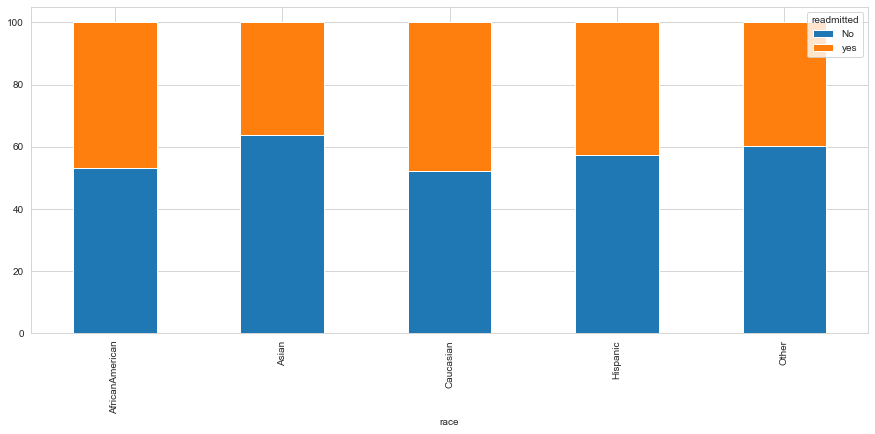

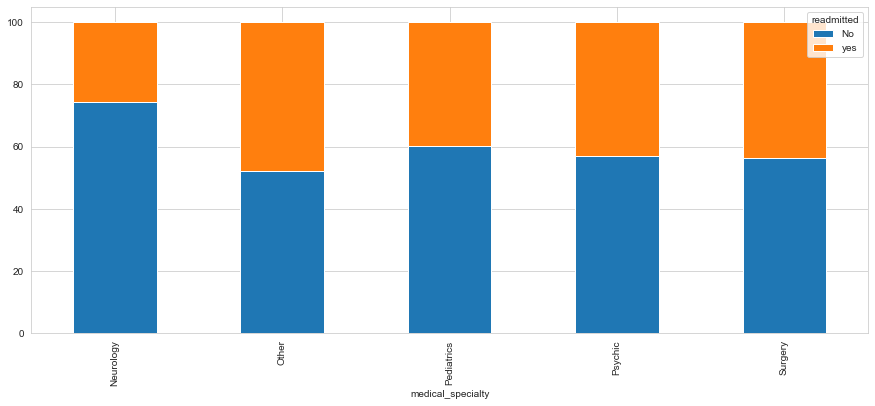

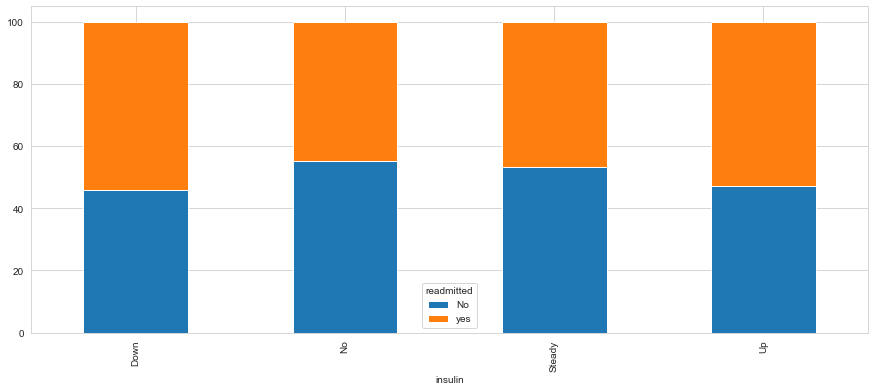

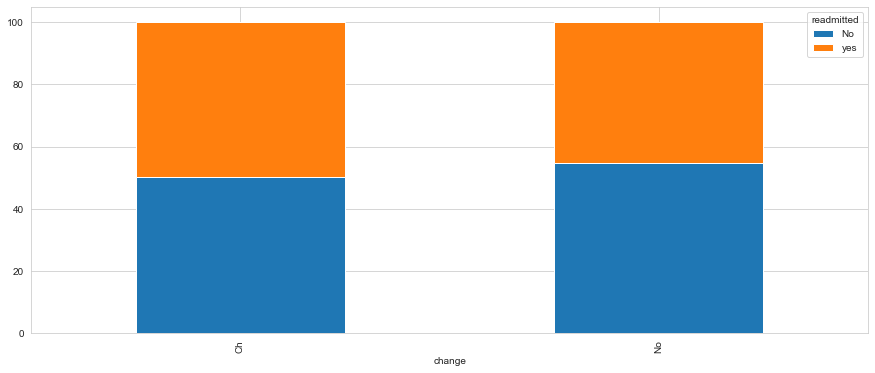

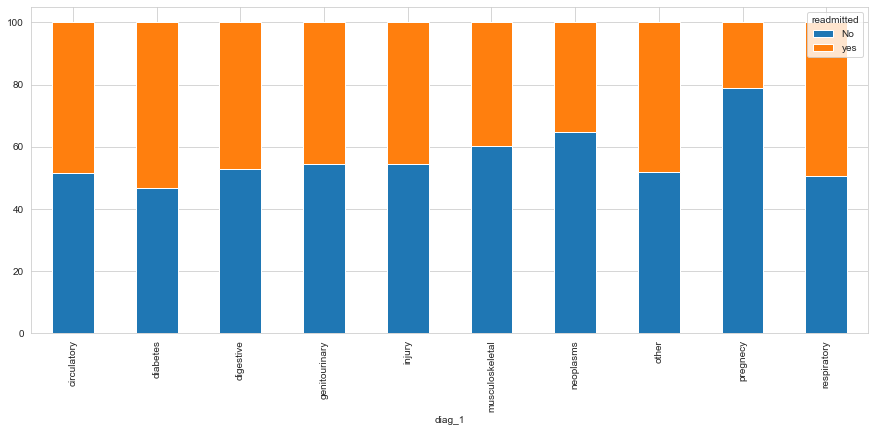

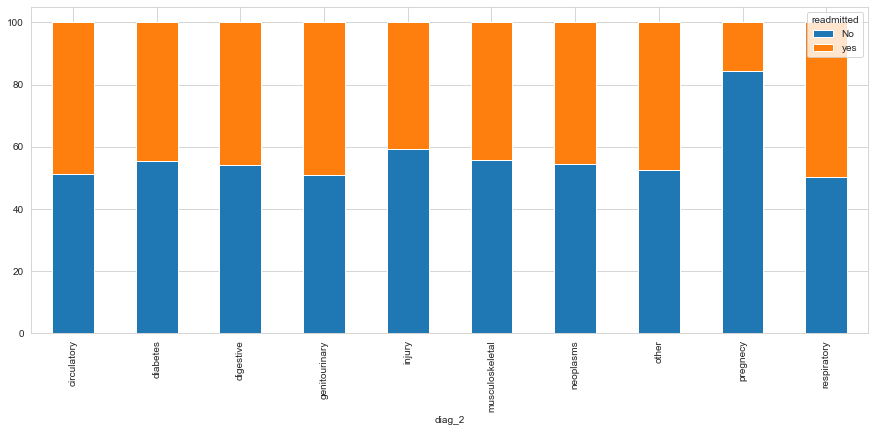

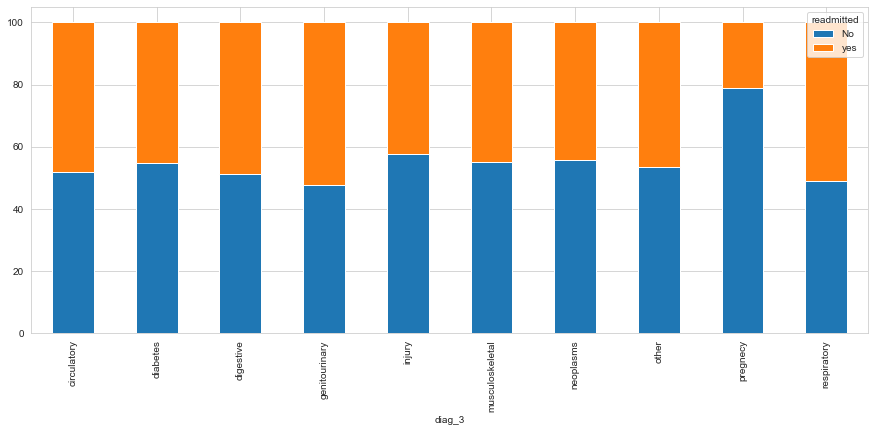

In [59]:
l=['race', 'gender', 'age', 'medical_specialty','max_glu_serum', 'A1Cresult','insulin','change', 'diabetesMed','diag_1','diag_2','diag_3']
for i in l:
    a=pd.crosstab(cat[i],cat['readmitted'])
    a['Sum']=a['NO']+a['Yes']
    a['No']=a['NO']*100/a['Sum']
    a['yes']=a['Yes']*100/a['Sum']
    a.drop(['NO','Yes','Sum'],axis=1).plot.bar(stacked=True,figsize=(15,6))
    plt.xticks(rotation=90)
    plt.show()


Inferences :-
1. Readmission rate of african/americans is almost same as caucaions despite less percentage of them in data,so on them focus can be done
2. Females are getting more readmiited than males,although they are more in dataset
3. People ageing between 60-90 are getting readmiited most
4. There are max readmiision cases from mixes specialities,neurology is showing the less readmission rate,learning can be done from this department
5. People having >300 level of max_glu_serum are readmiited more and people who r not done tests 50% of them is getting readmitted 
6. People having >8 level of A1cresult are readmiited more and people who r not done tests 50% of them is getting readmitted 
7. People with down insulin level are being readmiited more
8. If change is medicine is done,readmission is done also
9. If diabetes med is given then also readmission rate is high ,which is a concerning issue
10. People diagonised with diabetes in pimary phase is being readmiited more
11. In secondary diagonises people which respiratary,circulatory and genitourinary disease are readmitted more
 in final diagnosis if a perso is having genitourinary disease is gretting readmitted more

### Feature Engineering

In [60]:
df['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [61]:
cat=df1.loc[:,df1.dtypes==np.object]
cat=cat.reset_index()

In [62]:
cat.drop(['insulin','index'],axis=1,inplace=True)

In [63]:
cat.columns

Index(['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [64]:
#Creation of 4 new columns
#Feature engineering

up=0
no=0
steady=0
down=0
no_val=[]
up_val=[]
steady_val=[]
down_val=[]
for i in cat.iloc[:,9:-3].index:
    for j in cat.iloc[:,9:-3].columns:
        if cat[j].values[i]=='No':
            no+=1
        elif cat[j].values[i]=='Up':
            up+=1
        elif cat[j].values[i]=='Steady':
            steady+=1
        elif cat[j].values[i]=='Down':
            down+=1
    no_val.append(no)
    up_val.append(up)
    steady_val.append(steady)
    down_val.append(down)   
    up=0
    no=0
    steady=0
    down=0 

In [65]:
df1=df1.reset_index()
df1.drop('index',axis=1,inplace=True)

In [66]:
df1['No']=no_val
df1['Up']=up_val
df1['Steady']=steady_val
df1['Down']=down_val

In [67]:
df1.drop(['metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone'],axis=1,inplace=True)    #dropping diabetes medication columns

In [68]:
df1.shape

(96437, 30)

### Multivariate analysis

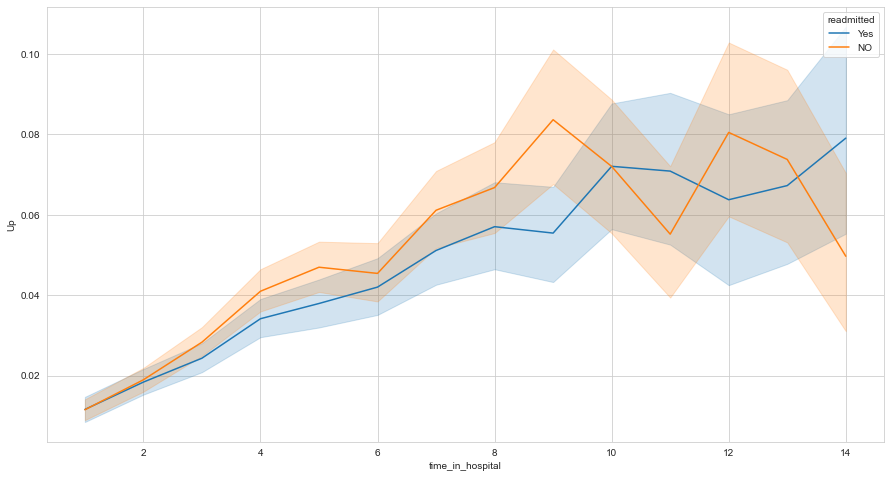

In [69]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['time_in_hospital'],df1['Up'],hue=df1['readmitted'])
plt.show()                                 

1. if a person is spending more time for cases if he is readmitted his dosage increase is recommeded
2. if a person is spending more time for cases if he is not readmitted his dosage increase is recommeded a bit less
3. if a peson is staying for less than 8 days and his/her dosage were increased then its non-readmission chances are high

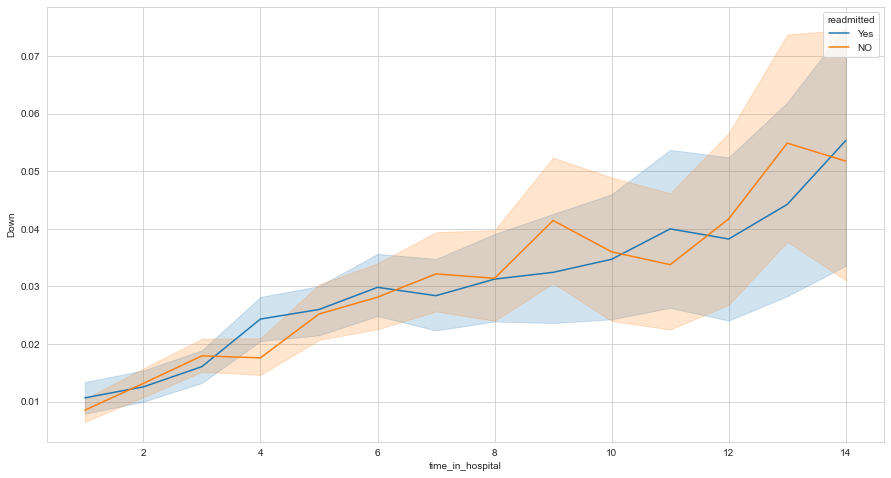

In [70]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['time_in_hospital'],df1['Down'],hue=df1['readmitted'])
plt.show()                          

1. if a person is spending more time for cases if he is readmitted his dosage increase
2. if a person is spending more time for cases if he is not readmitted his dosage decrease a bit
3. if a patient is staying less than 6 days and his/her dosage decreases then its readmission chances are more 

In [71]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['time_in_hospital'],df1['Steady'],hue=df1['readmitted'])
plt.show()         

1. if a person is spending more time for cases if he is readmitted his dosage decrease is recommeded
2. if a person is spending more time for cases if he is not readmitted his dosage decrease is recommeded a bit less
3. if a patient is staying less than 8 days and his/her dosage remain unchanged then its readmission chances are more 

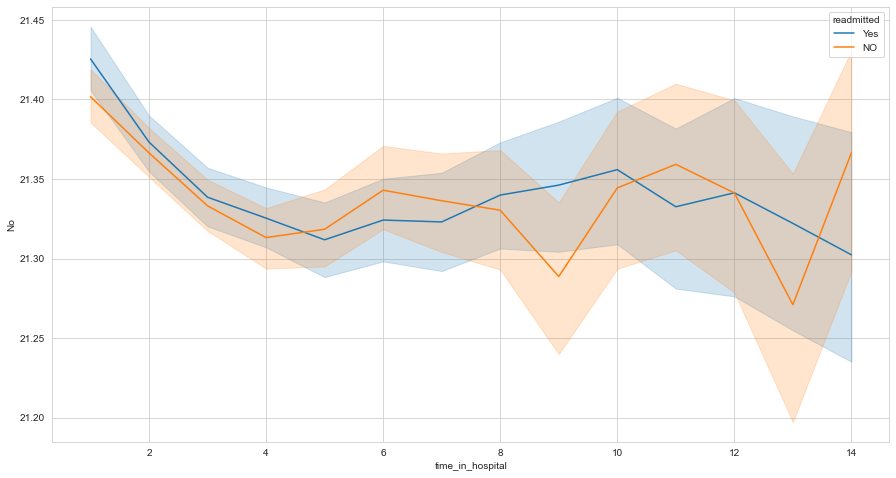

In [72]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['time_in_hospital'],df1['No'],hue=df1['readmitted'])
plt.show()                         

1. if a person is spending more time for cases if he is readmitted his dosage not recommended
2. less times when the person is readmitted again
3. if a patient is staying less than 8 days and no medicine recommended then its readmission chances are less

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(df1['medical_specialty'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* In psychic department time in hospital is max ,but people who r spending more time are getting readmitted more,pediatic is showing major diff in readmission rate,in surgery although mean days spent in hospital are same but varience people getting readmitted are more

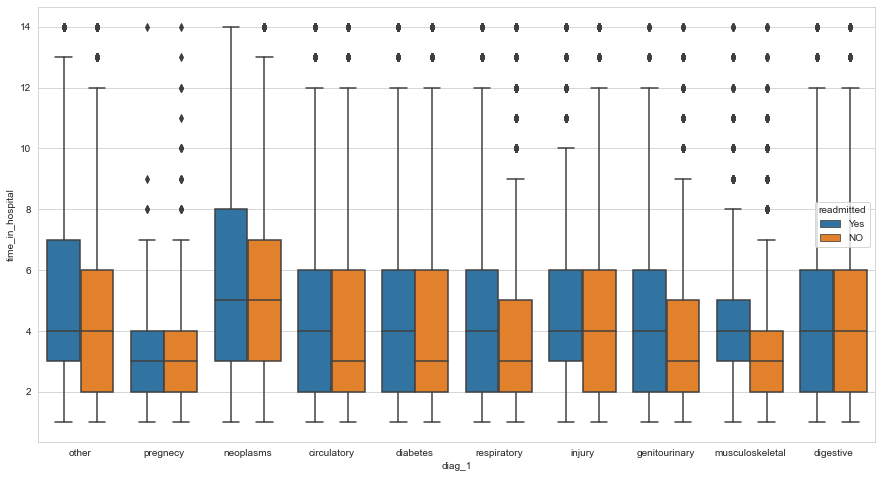

In [74]:
plt.figure(figsize=(15,8))
sns.boxplot(df1['diag_1'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* if pregnancy is diagoned primararily then time spend in hospital is less for both readmitted and not
variation in time in hospital is more for neoplasms department

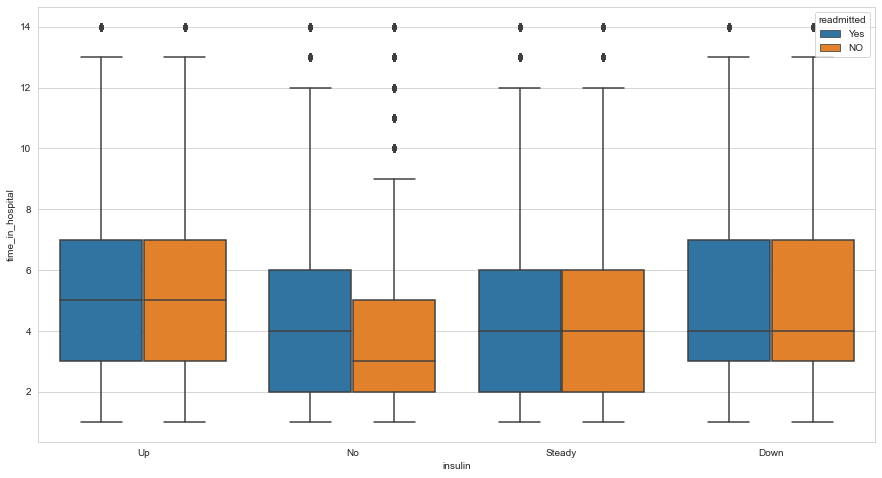

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(df1['insulin'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* When insulin is not recommended then readmission rate is high,it must be recommended,although its avg as compared is still low
but when not recommended the median time in hospital spend is less as compared

In [76]:
plt.figure(figsize=(15,8))
sns.pointplot(df1['insulin'],df1['time_in_hospital'],hue=df1['readmitted'],markers=["o", "x"],linestyles=["-", "--"])
sns.barplot(df1['insulin'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

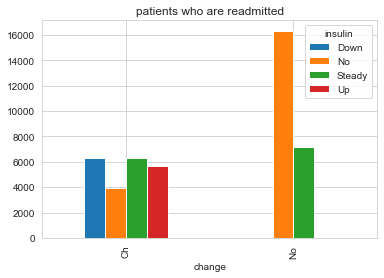

In [77]:
df11=df1[df1['readmitted']=='Yes']
a=pd.crosstab(df11['change'],df11['insulin'])
a.plot.bar()
plt.title('patients who are readmitted')
plt.show()
df12=df1[df1['readmitted']=='NO']
a1=pd.crosstab(df12['change'],df12['insulin'])
a1.plot.bar()
plt.title('patients who are not readmitted')
plt.show()

* whenever the insulin not prescribed most of the time meds didnt change happens whether be it case of readmission or non readmission
* also change in med is not recommended for people whether getting readmited or not

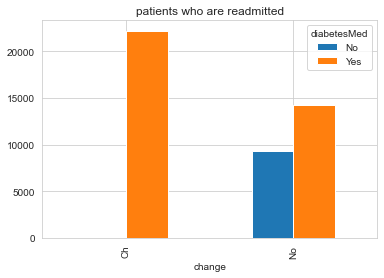

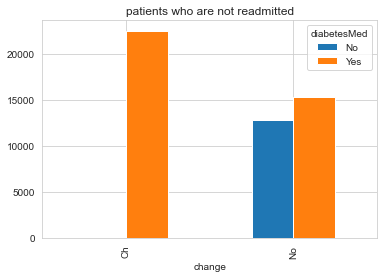

In [78]:
df11=df1[df1['readmitted']=='Yes']
a=pd.crosstab(df11['change'],df11['diabetesMed'])
a.plot.bar()
plt.title('patients who are readmitted')
plt.show()
df12=df1[df1['readmitted']=='NO']
a1=pd.crosstab(df12['change'],df12['diabetesMed'])
a1.plot.bar()
plt.title('patients who are not readmitted')
plt.show()

1. change in diabetesmed is been recommend everytime whether a patient is readmitted or not,and change is not done when 
med is not recommended
2. Even after change in med people are getting readmitted that means people are not getting diagoned properly

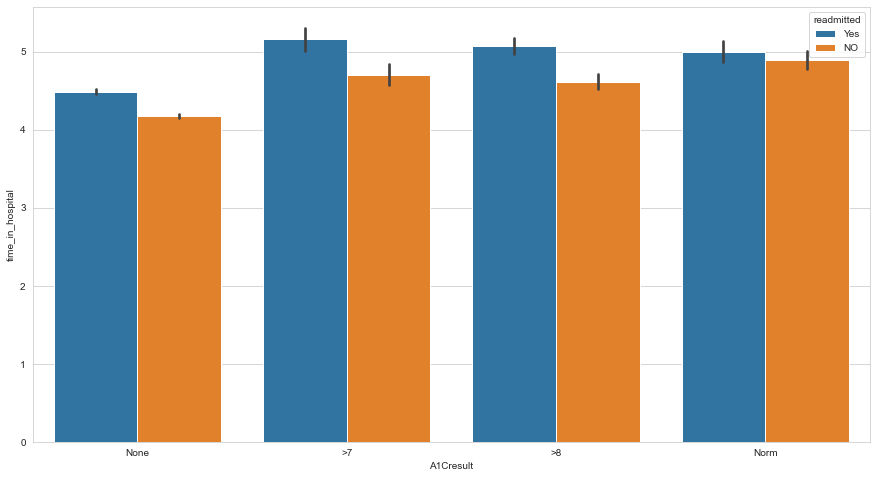

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(df1['A1Cresult'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* if diabetes level came more than normal then the readmission rate is also high,also even for norm level diabetes patient
readmission level is high,also becaz of diabetes may be other diaseses would have affected patient,this could be a reason for
high level diabetic patients

In [80]:
plt.figure(figsize=(15,8))
sns.barplot(df1['max_glu_serum'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

1. when glucose serum level is max then readmission rate is also more,we need to focus on that
2. when test is not being done readmission rate is quite high 

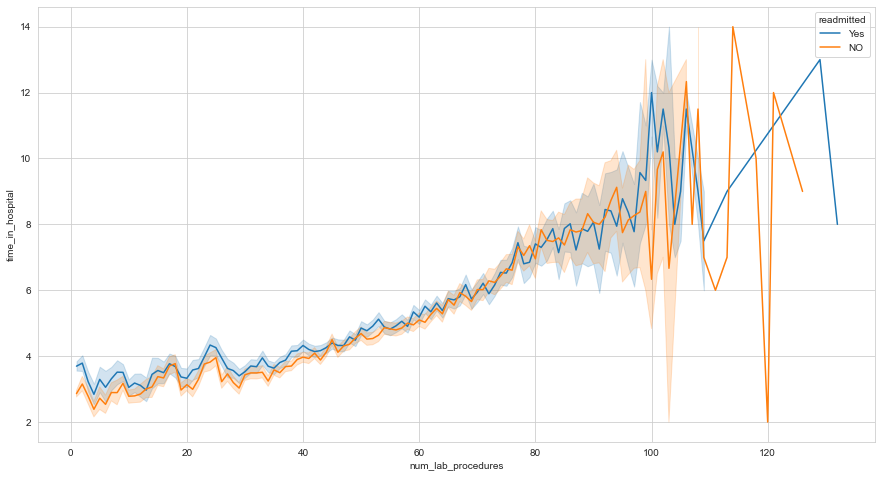

In [81]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['num_lab_procedures'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* as numlab procedures increases beyound 100 readmitted cases increases 

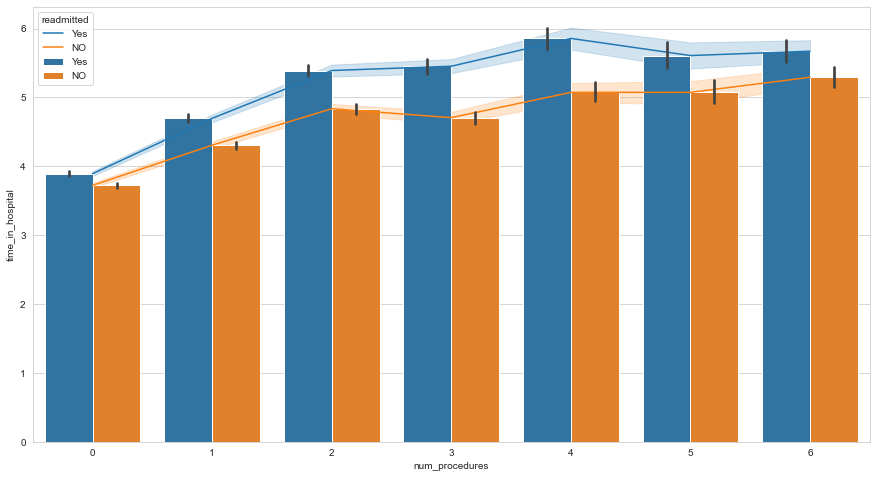

In [82]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['num_procedures'],df1['time_in_hospital'],hue=df1['readmitted'])
sns.barplot(df1['num_procedures'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* as num procedures increases ,time in hospital increases ,so do readmission  rate also

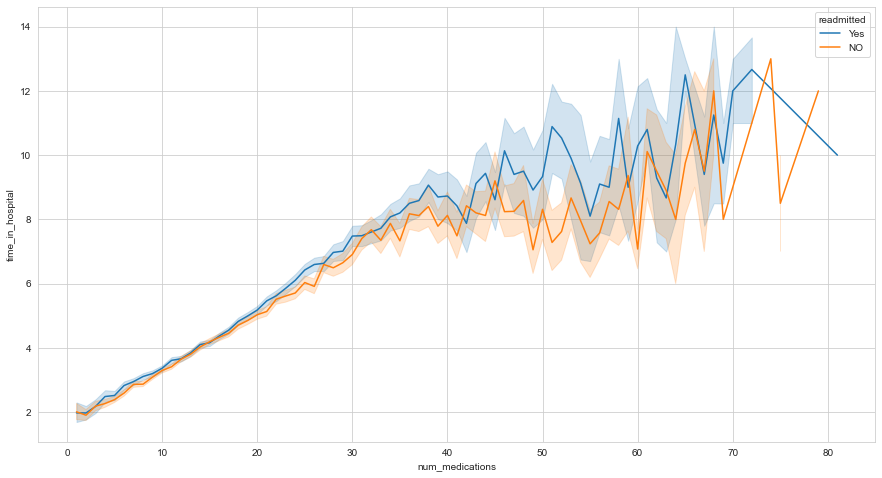

In [83]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['num_medications'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

In [84]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'No', 'Up', 'Steady', 'Down'],
      dtype='object')

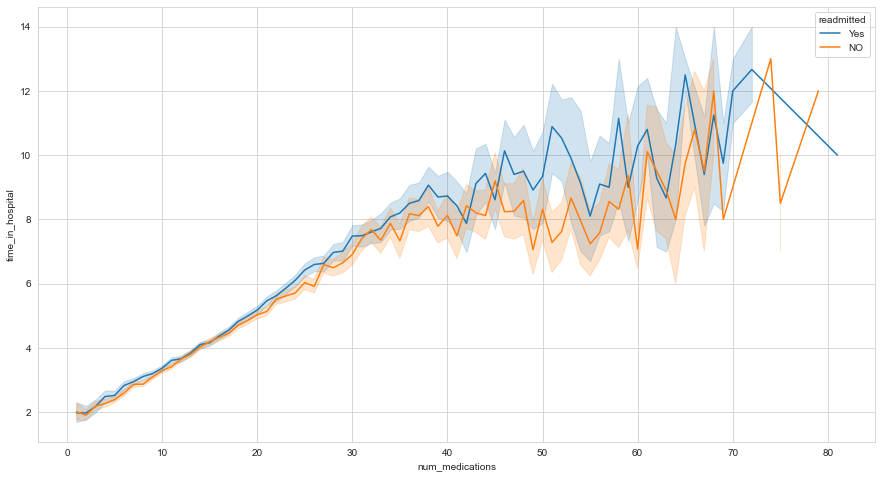

In [85]:
plt.figure(figsize=(15,8))
sns.lineplot(df1['num_medications'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

* as num_medications increase readmittion decreases

In [86]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'No', 'Up', 'Steady', 'Down'],
      dtype='object')

In [87]:
sns.clustermap(df1.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1).corr(),method='complete',annot=True,figsize=(15,10),cmap='viridis',row_cluster=False)
plt.show()

In [88]:
plt.figure(figsize=(15,8))
sns.pointplot(df1['diag_1'],df1['time_in_hospital'],hue=df1['readmitted'],markers=["o", "x"],linestyles=["-", "--"])

<AxesSubplot:xlabel='diag_1', ylabel='time_in_hospital'>

1. avg time spend in hospital is min for pregnancy and max for neoplasms for both readmitted or not
2. In musculoskeletal department the person who is getting readmitted again is spending more time in hospital

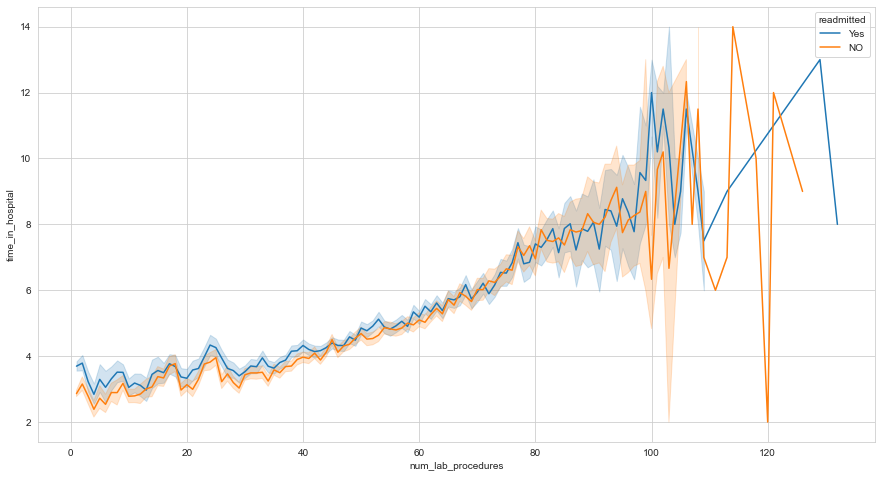

In [89]:
plt.figure(figsize=(15,8))

sns.lineplot(df1['num_lab_procedures'],df1['time_in_hospital'],hue=df1['readmitted'])
plt.show()

In [90]:
#num_lab_procedures doesnot have much impact on readmittion rate

In [91]:
cm = sns.light_palette("brown", as_cmap=True)
pd.crosstab(df1["change"], df1['insulin']).style.background_gradient(cmap = cm)

### Checking Multicollinearity and correlation

In [92]:
#for numerical features

In [93]:
vif=pd.DataFrame()
X=df1.select_dtypes(exclude='O')

In [94]:
plt.figure(figsize=(18,8))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [95]:
vif['features']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(0,len(X.columns))]
vif.sort_values('vif',ascending=False)

features        vif
13                        No  28.346560
8            num_medications   1.612292
15                    Steady   1.606442
0               encounter_id   1.498300
1                patient_nbr   1.418448
5           time_in_hospital   1.404034
7             num_procedures   1.228053
12          number_diagnoses   1.218128
6         num_lab_procedures   1.216622
2          admission_type_id   1.126209
4        admission_source_id   1.122444
11          number_inpatient   1.115948
10          number_emergency   1.092566
3   discharge_disposition_id   1.084352
14                        Up   1.045383
9          number_outpatient   1.037983
16                      Down   1.027478

* no_diagnoses,num_medication,num_lab_procedures have high multicollinearity

## Statistical Tests

In [96]:
#for categorical columns checking string correlation with target variable ,we do statistical tests

In [97]:
cat1=df1.loc[:,df1.dtypes==np.object]
cat1.columns

Index(['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

### Categorical-Categorical Analysis

In [98]:
#Doing Chi2 test for checking significance of any column with target variable

In [99]:
#H0:Target feature doesnot have significant impact on other Categorical Features
#H1:Target feature does have significant impact on other Categorical Features

In [100]:
import scipy.stats as st
for i in cat1.columns[:-1]:
    t=pd.crosstab(df['readmitted'],df[i])
    print('chi2 test p-value for',i,'Feature',st.chi2_contingency(t)[1])

chi2 test p-value for race Feature 5.95789875228234e-17
chi2 test p-value for gender Feature 1.4472723188688075e-07
chi2 test p-value for age Feature 9.348415309480361e-56
chi2 test p-value for medical_specialty Feature 1.8404284943510645e-170
chi2 test p-value for diag_1 Feature 0.0
chi2 test p-value for diag_2 Feature 2.9706953128805253e-223
chi2 test p-value for diag_3 Feature 4.0000590068086736e-182
chi2 test p-value for max_glu_serum Feature 1.9333043719858424e-09
chi2 test p-value for A1Cresult Feature 3.8557506428457006e-13
chi2 test p-value for insulin Feature 2.1265863574275524e-108
chi2 test p-value for change Feature 1.362060823556665e-47
chi2 test p-value for diabetesMed Feature 1.175514151065395e-84


p value<SL(0.05) so rejecting Null Hypothesis
* readmission categories have significant impact on all categorical features

### Categorical-Numerical Analysis

In [101]:
#checking for normality

In [102]:
for i in num.columns[5:]:
    a=st.jarque_bera(df[i])
    print('pvalue of',i,'readmitted is ',a[1])

pvalue of time_in_hospital readmitted is  0.0
pvalue of num_lab_procedures readmitted is  0.0
pvalue of num_procedures readmitted is  0.0
pvalue of num_medications readmitted is  0.0
pvalue of number_outpatient readmitted is  0.0
pvalue of number_emergency readmitted is  0.0
pvalue of number_inpatient readmitted is  0.0
pvalue of number_diagnoses readmitted is  0.0


In [ ]:
#pvalue>Sl,doenot follow normal distribution

In [104]:
#H0:Target feature doesnot have significant impact on other Numerical Features
#H1:Target feature does have significant impact on other Numerical Features

In [105]:
#Non-parametric-test
for i in num.columns[5:]:
    a=st.mannwhitneyu(df1[df1['readmitted']=='NO'][i],df1[df1['readmitted']=='Yes'][i])[1]
    
    print('pvalue of',i,'readmitted is ',a)

pvalue of time_in_hospital readmitted is  7.429238175343377e-77
pvalue of num_lab_procedures readmitted is  2.0642157709775373e-48
pvalue of num_procedures readmitted is  1.4821616962489203e-42
pvalue of num_medications readmitted is  1.6237120398467512e-109
pvalue of number_outpatient readmitted is  4.901345046698777e-248
pvalue of number_emergency readmitted is  0.0
pvalue of number_inpatient readmitted is  0.0
pvalue of number_diagnoses readmitted is  6.379396070962425e-252


p value<SL(0.05) so rejecting Null Hypothesis
* readmission categories have significant impact on numerical features

### Label Encoding

In [106]:
df2=df1.drop(['encounter_id','patient_nbr'],axis=1)

le=LabelEncoder()

In [107]:
for i in cat1.columns:
    df2[i]=le.fit_transform(df2[i])

In [108]:
df2.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0     2       0    1                  1                         1   
1     0       0    2                  1                         1   
2     2       1    3                  1                         1   
3     2       1    4                  1                         1   
4     2       1    5                  1                         1   

   admission_source_id  time_in_hospital  medical_specialty  \
0                    7                 3                  1   
1                    7                 2                  1   
2                    7                 2                  1   
3                    7                 1                  1   
4                    1                 3                  1   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                  59               0               18                  0   
1                  11               5               13                  2   
2                  44               1               16                  0   
3                  51               0                8                  0   
4                  31               6               16                  0   

   number_emergency  number_inpatient  diag_1  diag_2  diag_3  \
0                 0                 0       7       1       7   
1                 0                 1       8       1       7   
2                 0                 0       7       1       0   
3                 0                 0       6       6       1   
4                 0                 0       0       0       1   

   number_diagnoses  max_glu_serum  A1Cresult  insulin  change  diabetesMed  \
0                 9              2          2        3       0            1   
1                 6              2          2        1       1            1   
2                 7              2          2        3       0            1   
3                 5              2          2        2       0            1   
4                 9              2          2        2       1            1   

   readmitted  No  Up  Steady  Down  
0           1  22   0       0     0  
1           0  21   0       1     0  
2           0  22   0       0     0  
3           0  21   0       1     0  
4           1  22   0       0     0

In [109]:
df2.shape

(96437, 28)

In [110]:
df2.dtypes

race                        int32
gender                      int32
age                         int32
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
medical_specialty           int32
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int32
A1Cresult                   int32
insulin                     int32
change                      int32
diabetesMed                 int32
readmitted                  int32
No                          int64
Up                          int64
Steady                      int64
Down                        int64
dtype: object

### Correlation Check

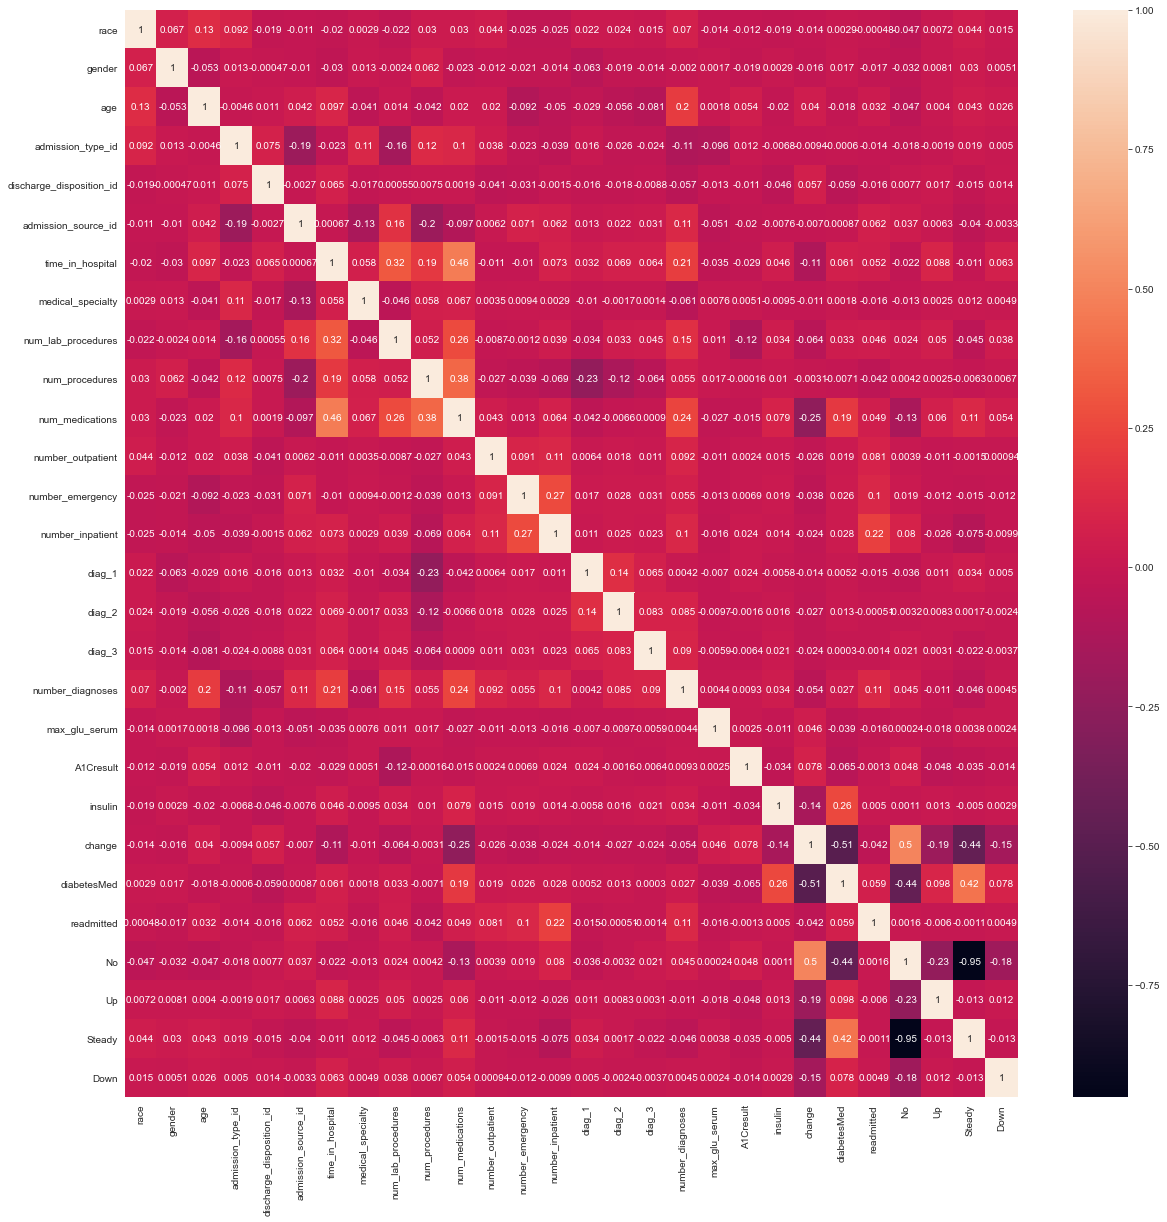

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [112]:
df2.corr()

race    gender       age  admission_type_id  \
race                      1.000000  0.066699  0.131856           0.091708   
gender                    0.066699  1.000000 -0.052794           0.013423   
age                       0.131856 -0.052794  1.000000          -0.004583   
admission_type_id         0.091708  0.013423 -0.004583           1.000000   
discharge_disposition_id -0.019239 -0.000474  0.011027           0.074776   
admission_source_id      -0.011453 -0.009985  0.041663          -0.191318   
time_in_hospital         -0.020178 -0.029570  0.097250          -0.023307   
medical_specialty         0.002910  0.013079 -0.040626           0.106268   
num_lab_procedures       -0.022166 -0.002418  0.013570          -0.156384   
num_procedures            0.029750  0.062084 -0.042280           0.117060   
num_medications           0.029707 -0.022736  0.020316           0.100619   
number_outpatient         0.044005 -0.012321  0.020089           0.038155   
number_emergency         -0.025141 -0.020676 -0.092052          -0.022917   
number_inpatient         -0.025394 -0.014400 -0.049912          -0.039390   
diag_1                    0.021675 -0.063315 -0.028540           0.015754   
diag_2                    0.023960 -0.018964 -0.055570          -0.026263   
diag_3                    0.015388 -0.014249 -0.080689          -0.024039   
number_diagnoses          0.069748 -0.001989  0.202442          -0.111938   
max_glu_serum            -0.013702  0.001690  0.001779          -0.096072   
A1Cresult                -0.012090 -0.018655  0.053599           0.012208   
insulin                  -0.018938  0.002902 -0.019623          -0.006799   
change                   -0.013675 -0.015634  0.039738          -0.009434   
diabetesMed               0.002926  0.016635 -0.017905          -0.000599   
readmitted               -0.000481 -0.017161  0.031566          -0.013535   
No                       -0.046551 -0.031678 -0.047250          -0.018411   
Up                        0.007236  0.008085  0.004042          -0.001889   
Steady                    0.043878  0.030044  0.043347           0.018744   
Down                      0.015040  0.005149  0.025698           0.005020   

                          discharge_disposition_id  admission_source_id  \
race                                     -0.019239            -0.011453   
gender                                   -0.000474            -0.009985   
age                                       0.011027             0.041663   
admission_type_id                         0.074776            -0.191318   
discharge_disposition_id                  1.000000            -0.002651   
admission_source_id                      -0.002651             1.000000   
time_in_hospital                          0.064748             0.000665   
medical_specialty                        -0.016785            -0.130472   
num_lab_procedures                        0.000549             0.159622   
num_procedures                            0.007505            -0.195145   
num_medications                           0.001929            -0.096679   
number_outpatient                        -0.041489             0.006157   
number_emergency                         -0.031369             0.070514   
number_inpatient                         -0.001474             0.061648   
diag_1                                   -0.015750             0.012651   
diag_2                                   -0.018255             0.022038   
diag_3                                   -0.008774             0.030703   
number_diagnoses                         -0.056916             0.114230   
max_glu_serum                            -0.013295            -0.051065   
A1Cresult                                -0.010625            -0.020099   
insulin                                  -0.045547            -0.007582   
change                                    0.057109            -0.006953   
diabetesMed                              -0.059428             0.000868

1. time_in_hospital and num_medication are seeing a bit correlation
2. No and change are seeing a bit correlation
3. No and steady are negatively correlated
4. change and steady are negatively correlated

## Model Building

In [113]:
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'No', 'Up', 'Steady', 'Down'],
      dtype='object')

In [114]:

X=df2.drop(['readmitted'],axis=1)
y=df2['readmitted']

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.75,random_state=1,stratify=y)

In [116]:
for i in xtrain.columns:
    print(xtrain[i].value_counts())

2    55307
0    14007
3     1467
4     1078
1      468
Name: race, dtype: int64
0    39118
1    33209
Name: gender, dtype: int64
7    18508
6    16130
5    12418
8    12231
4     6906
3     2679
9     1964
2     1096
1      347
0       48
Name: age, dtype: int64
1    51315
3    13466
5     7537
4        9
Name: admission_type_id, dtype: int64
1     52963
2     15318
18     3417
7       446
28      106
10       73
27        4
Name: discharge_disposition_id, dtype: int64
7     41078
1     21993
9      5052
4      4188
8        12
11        4
Name: admission_source_id, dtype: int64
3     12674
2     12155
1      9894
4      9889
5      7166
6      5396
7      4198
8      3179
9      2146
10     1695
11     1300
12     1045
13      852
14      738
Name: time_in_hospital, dtype: int64
1    67210
4     3369
3     1012
0      483
2      253
Name: medical_specialty, dtype: int64
1      2295
43     2028
44     1784
45     1695
38     1599
       ... 
107       1
114       1
129       1
118     

In [117]:
#Scaling

In [118]:
#features in list l have values within -3 to 3 so no need to scale for rest features scaling can be done

In [119]:
l=['gender','max_glu_serum','A1Cresult','insulin','change','Up','Down']
ss=StandardScaler()
for i in xtrain.columns:
    if i not in l:
        xtrain[i]=ss.fit_transform(xtrain[[i]])
        xtest[i]=ss.transform(xtest[[i]])

In [120]:
#Logistic Regresion model

In [121]:
pipe_logi=Pipeline((
('pt',PowerTransformer()),
('lr',LogisticRegression())
))
pipe_logi.fit(xtrain,ytrain)
ypred_logi=pipe_logi.predict(xtest)
ytpred_logi=pipe_logi.predict(xtrain)
logi_score=accuracy_score(ytest,ypred_logi)
logi_scoret=accuracy_score(ytrain,ytpred_logi)
ypredprob_logi=pipe_logi.predict_proba(xtest)
ypredprobt_logi=pipe_logi.predict_proba(xtrain)

In [122]:
print('Accuracy score for Training set of Logistic Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_logi)*100))
print('Accuracy score for Test set of Logistic Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_logi)*100))
print('Roc_Auc score for Test set of Logistic Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_logi[:,1])*100))
print('Roc_Auc score for Train set of Logistic Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_logi[:,1])*100))
print('Confusion Matrix for Test set of Logistic Model is :',confusion_matrix(ytest,ypred_logi),sep='\n')

Accuracy score for Training set of Logistic Model is :61.90%
Accuracy score for Test set of Logistic Model is : 61.84%
Roc_Auc score for Test set of Logistic Model is : 65.77%
Roc_Auc score for Train set of Logistic Model is : 65.75%
Confusion Matrix for Test set of Logistic Model is :
[[9235 3446]
 [5755 5674]]


#### Threshold Check for Logistic Model

In [123]:
fpr,tpr,thres=roc_curve(ytest,ypredprob_logi[:,1])
accuracy=[]
for i in thres:
    y_predf=np.where(ypredprob_logi[:,1]>i,1,0)
    accuracy.append(accuracy_score(ytest,y_predf,normalize=True))
accuracy=pd.concat([pd.Series(thres),pd.Series(accuracy)],axis=1)
accuracy.columns=['Thresholds','Accuracy scores']
accuracy.sort_values(by='Accuracy scores',ascending=False)

Thresholds  Accuracy scores
4224     0.495949         0.619867
4225     0.495726         0.619826
4226     0.495677         0.619784
4219     0.496217         0.619784
4220     0.496183         0.619743
...           ...              ...
11085    0.223873         0.475280
11086    0.223641         0.475238
11087    0.209220         0.474285
11088    0.209185         0.474243
11089    0.193324         0.474077

[11090 rows x 2 columns]

In [124]:
#KNN

In [125]:
pipe_knn=Pipeline((
('pt',PowerTransformer()),
('knn',KNeighborsClassifier(n_neighbors=5,metric='euclidean'))
))
pipe_knn.fit(xtrain,ytrain)
ypred_knn=pipe_knn.predict(xtest)
ytpred_knn=pipe_knn.predict(xtrain)
knn_score=accuracy_score(ytest,ypred_knn)
knn_scoret=accuracy_score(ytrain,ytpred_knn)
ypredprob_knn=pipe_knn.predict_proba(xtest)
ypredprobt_knn=pipe_knn.predict_proba(xtrain)

In [126]:
print('Accuracy score for Training set of KNeighborsClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_knn)*100))
print('Accuracy score for Test set of KNeighborsClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_knn)*100))
print('Roc_Auc score for Test set of KNeighborsClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_knn[:,1])*100))
print('Roc_Auc score for Train set of KNeighborsClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_knn[:,1])*100))
print('Confusion Matrix for Test set of KNeighborsClassifier Model is :',confusion_matrix(ytest,ypred_knn),sep='\n')

Accuracy score for Training set of KNeighborsClassifier Model is :72.33%
Accuracy score for Test set of KNeighborsClassifier Model is : 57.72%
Roc_Auc score for Test set of KNeighborsClassifier Model is : 59.52%
Roc_Auc score for Train set of KNeighborsClassifier Model is : 79.47%
Confusion Matrix for Test set of KNeighborsClassifier Model is :
[[7904 4777]
 [5416 6013]]


KNN model is overfitting

In [127]:
#Decision Tree

In [128]:
pipe_dt=Pipeline((
('pt',PowerTransformer()),
('dt',DecisionTreeClassifier(criterion='entropy',max_depth=5))
))
pipe_dt.fit(xtrain,ytrain)
ypred_dt=pipe_dt.predict(xtest)
ytpred_dt=pipe_dt.predict(xtrain)
dt_score=accuracy_score(ytest,ypred_dt)
dt_scoret=accuracy_score(ytrain,ytpred_dt)
ypredprob_dt=pipe_dt.predict_proba(xtest)
ypredprobt_dt=pipe_dt.predict_proba(xtrain)

In [129]:
print('Accuracy score for Training set of DecisionTreeClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_dt)*100))
print('Accuracy score for Test set of DecisionTreeClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_dt)*100))
print('Roc_Auc score for Test set of DecisionTreeClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_dt[:,1])*100))
print('Roc_Auc score for Train set of DecisionTreeClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_dt[:,1])*100))
print('Confusion Matrix for Test set of DecisionTreeClassifier Model is :',confusion_matrix(ytest,ypred_dt),sep='\n')

Accuracy score for Training set of DecisionTreeClassifier Model is :62.29%
Accuracy score for Test set of DecisionTreeClassifier Model is : 61.99%
Roc_Auc score for Test set of DecisionTreeClassifier Model is : 65.29%
Roc_Auc score for Train set of DecisionTreeClassifier Model is : 65.66%
Confusion Matrix for Test set of DecisionTreeClassifier Model is :
[[9347 3334]
 [5831 5598]]


In [130]:
#Random forest

In [131]:
pipe_rf=Pipeline((
('pt',PowerTransformer()),
('dt',RandomForestClassifier(criterion='entropy',n_estimators=100))
))
pipe_rf.fit(xtrain,ytrain)
ypred_rf=pipe_rf.predict(xtest)
ytpred_rf=pipe_rf.predict(xtrain)
rf_score=accuracy_score(ytest,ypred_rf)
rf_scoret=accuracy_score(ytrain,ytpred_rf)
ypredprob_rf=pipe_rf.predict_proba(xtest)
ypredprobt_rf=pipe_rf.predict_proba(xtrain)

In [132]:
print('Accuracy score for Training set of RandomForestClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_rf)*100))
print('Accuracy score for Test set of RandomForestClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_rf)*100))
print('Roc_Auc score for Test set of RandomForestClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_rf[:,1])*100))
print('Roc_Auc score for Train set of RandomForestClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_rf[:,1])*100))
print('Confusion Matrix for Test set of RandomForestClassifier Model is :',confusion_matrix(ytest,ypred_rf),sep='\n')

Accuracy score for Training set of RandomForestClassifier Model is :100.00%
Accuracy score for Test set of RandomForestClassifier Model is : 62.13%
Roc_Auc score for Test set of RandomForestClassifier Model is : 66.41%
Roc_Auc score for Train set of RandomForestClassifier Model is : 100.00%
Confusion Matrix for Test set of RandomForestClassifier Model is :
[[8827 3854]
 [5277 6152]]


It is a overfit model so regularization can be done

In [133]:
#AdaBoost Model

In [134]:
pipe_ad=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(n_estimators=100))
))
pipe_ad.fit(xtrain,ytrain)
ypred_ad=pipe_ad.predict(xtest)
ytpred_ad=pipe_ad.predict(xtrain)
ad_score=accuracy_score(ytest,ypred_ad)
ad_scoret=accuracy_score(ytrain,ytpred_ad)
ypredprob_ad=pipe_ad.predict_proba(xtest)
ypredprobt_ad=pipe_ad.predict_proba(xtrain)

In [135]:
print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_ad)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_ad)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_ad[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_ad[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytest,ypred_ad),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.63%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.42%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 66.95%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 67.14%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9462 3219]
 [5842 5587]]


In [136]:
#GradientBoosting model

In [137]:
pipe_gb=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier(n_estimators=100))
))
pipe_gb.fit(xtrain,ytrain)
ypred_gb=pipe_ad.predict(xtest)
ytpred_gb=pipe_ad.predict(xtrain)
gb_score=accuracy_score(ytest,ypred_gb)
gb_scoret=accuracy_score(ytrain,ytpred_gb)
ypredprob_gb=pipe_gb.predict_proba(xtest)
ypredprobt_gb=pipe_gb.predict_proba(xtrain)

In [138]:
print('Accuracy score for Training set of GradientBoostingClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_gb)*100))
print('Accuracy score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_gb)*100))
print('Roc_Auc score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_gb[:,1])*100))
print('Roc_Auc score for Train set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_gb[:,1])*100))
print('Confusion Matrix for Test set of GradientBoostingClassifier Model is :',confusion_matrix(ytest,ypred_gb),sep='\n')

Accuracy score for Training set of GradientBoostingClassifier Model is :62.63%
Accuracy score for Test set of GradientBoostingClassifier Model is : 62.42%
Roc_Auc score for Test set of GradientBoostingClassifier Model is : 67.80%
Roc_Auc score for Train set of GradientBoostingClassifier Model is : 68.27%
Confusion Matrix for Test set of GradientBoostingClassifier Model is :
[[9462 3219]
 [5842 5587]]


In [139]:
#XGboost

In [140]:
pipe_xgb=Pipeline((
('pt',PowerTransformer()),
('xgb',XGBClassifier())
))
pipe_xgb.fit(xtrain,ytrain)
ypred_xgb=pipe_ad.predict(xtest)
ytpred_xgb=pipe_ad.predict(xtrain)
xgb_score=accuracy_score(ytest,ypred_xgb)
xgb_scoret=accuracy_score(ytrain,ytpred_xgb)
ypredprob_xgb=pipe_xgb.predict_proba(xtest)
ypredprobt_xgb=pipe_xgb.predict_proba(xtrain)

[20:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [141]:
print('Accuracy score for Training set of XGBClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain,ytpred_xgb)*100))
print('Accuracy score for Test set of XGBClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest,ypred_xgb)*100))
print('Roc_Auc score for Test set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest,ypredprob_xgb[:,1])*100))
print('Roc_Auc score for Train set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain,ypredprobt_xgb[:,1])*100))
print('Confusion Matrix for Test set of XGBClassifier Model is :',confusion_matrix(ytest,ypred_xgb),sep='\n')

Accuracy score for Training set of XGBClassifier Model is :62.63%
Accuracy score for Test set of XGBClassifier Model is : 62.42%
Roc_Auc score for Test set of XGBClassifier Model is : 67.60%
Roc_Auc score for Train set of XGBClassifier Model is : 76.80%
Confusion Matrix for Test set of XGBClassifier Model is :
[[9462 3219]
 [5842 5587]]


In [142]:
#comparing all models

In [143]:
l=[logi_score,knn_score,dt_score,rf_score,ad_score,gb_score,xgb_score]
lt=[logi_scoret,knn_scoret,dt_scoret,rf_scoret,ad_scoret,gb_scoret,xgb_scoret]
l1=['Logistic Regression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier',
    'GradientBoostingClassifier','XGBClassifier']
compare=pd.DataFrame({'Models':l1,'Test Score':l,'Train Score':lt})
compare.sort_values(by='Test Score',ascending=False)

Models  Test Score  Train Score
4          AdaBoostClassifier    0.624181     0.626350
5  GradientBoostingClassifier    0.624181     0.626350
6               XGBClassifier    0.624181     0.626350
3      RandomForestClassifier    0.621277     0.999986
2      DecisionTreeClassifier    0.619867     0.622921
0         Logistic Regression    0.618374     0.618994
1        KNeighborsClassifier    0.577229     0.723285

In [144]:
l=[logi_score,knn_score,dt_score,rf_score,ad_score,gb_score]
lt=[logi_scoret,knn_scoret,dt_scoret,rf_scoret,ad_scoret,gb_scoret]
l1=['Logistic Regression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier',
    'GradientBoostingClassifier']
compare=pd.DataFrame({'Models':l1,'Test Score':l,'Train Score':lt})
compare.sort_values(by='Test Score',ascending=False)

Models  Test Score  Train Score
4          AdaBoostClassifier    0.624181     0.626350
5  GradientBoostingClassifier    0.624181     0.626350
3      RandomForestClassifier    0.621277     0.999986
2      DecisionTreeClassifier    0.619867     0.622921
0         Logistic Regression    0.618374     0.618994
1        KNeighborsClassifier    0.577229     0.723285

In [145]:
ada_df=pd.DataFrame({'Model':['AdaBoostClassifier'],'Base Model Score':[ad_score]})

In [146]:
gb_df=pd.DataFrame({'Model':['GradientBoostClassifier'],'Base Model Score':[gb_score]})

#### Combined ROC curve for all models

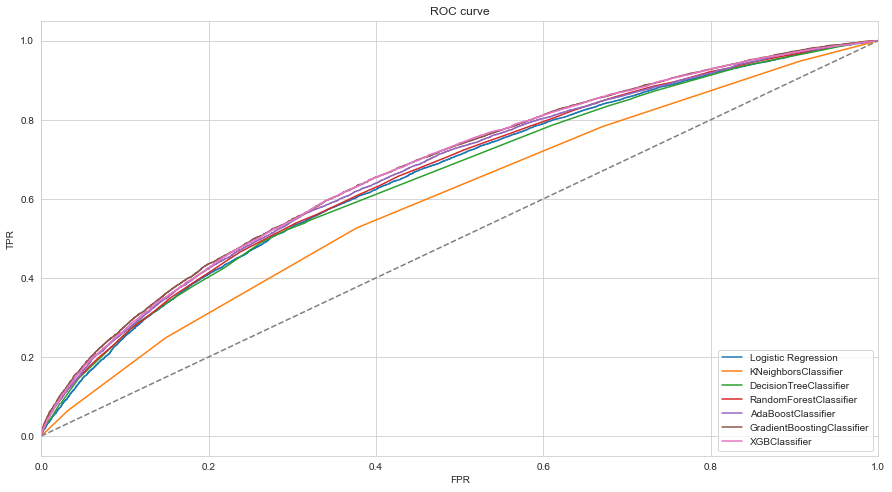

In [147]:
#Roc curve
plt.figure(figsize=(15,8))
fpr1,tpr1,thres1=roc_curve(ytest,ypredprob_logi[:,1])
fpr2,tpr2,thres2=roc_curve(ytest,ypredprob_knn[:,1])
fpr3,tpr3,thres3=roc_curve(ytest,ypredprob_dt[:,1])
fpr4,tpr4,thres4=roc_curve(ytest,ypredprob_rf[:,1])
fpr5,tpr5,thres5=roc_curve(ytest,ypredprob_ad[:,1])
fpr6,tpr6,thres6=roc_curve(ytest,ypredprob_gb[:,1])
fpr7,tpr7,thres7=roc_curve(ytest,ypredprob_xgb[:,1])
plt.plot(fpr1,tpr1,label='Logistic Regression')
plt.plot(fpr2,tpr2,label='KNeighborsClassifier')
plt.plot(fpr3,tpr3,label='DecisionTreeClassifier')
plt.plot(fpr4,tpr4,label='RandomForestClassifier')
plt.plot(fpr5,tpr5,label='AdaBoostClassifier')
plt.plot(fpr6,tpr6,label='GradientBoostingClassifier')
plt.plot(fpr7,tpr7,label='XGBClassifier')
plt.plot([0,1],[0,1],'--')
plt.xlim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()  

* KNN is doing worst
* Boosting techniques are doing good here

#### Calculating mean threshold for all models

In [148]:
# lt=[pd.Series(ypredprob_logi[:,1]),pd.Series(ypredprob_knn[:,1]),pd.Series(ypredprob_dt[:,1]),pd.Series(ypredprob_rf[:,1]),pd.Series(ypredprob_ad[:,1]),pd.Series(ypredprob_gb[:,1]),pd.Series(ypredprob_xgb[:,1])]
# l1=['Logistic Regression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier',
#     'GradientBoostingClassifier','XGBClassifier']
# roc=pd.DataFrame({'Models':l1,'Prob Values':l})

# pred=pd.concat(lt,axis=1).mean(axis=1)
# print(roc_auc_score(ytest,pred))

In [149]:

# fpr,tpr,thres=roc_curve(ytest,pred)
# accuracy=[]
# for i in thres:
#     y_predf=np.where(pred>i,1,0)
#     accuracy.append(accuracy_score(ytest,y_predf,normalize=True))
# accuracy=pd.concat([pd.Series(thres),pd.Series(accuracy)],axis=1)
# accuracy.columns=['Thresholds','Accuracy scores']
# accuracy.sort_values(by='Accuracy scores',ascending=False)

### Feature Selection

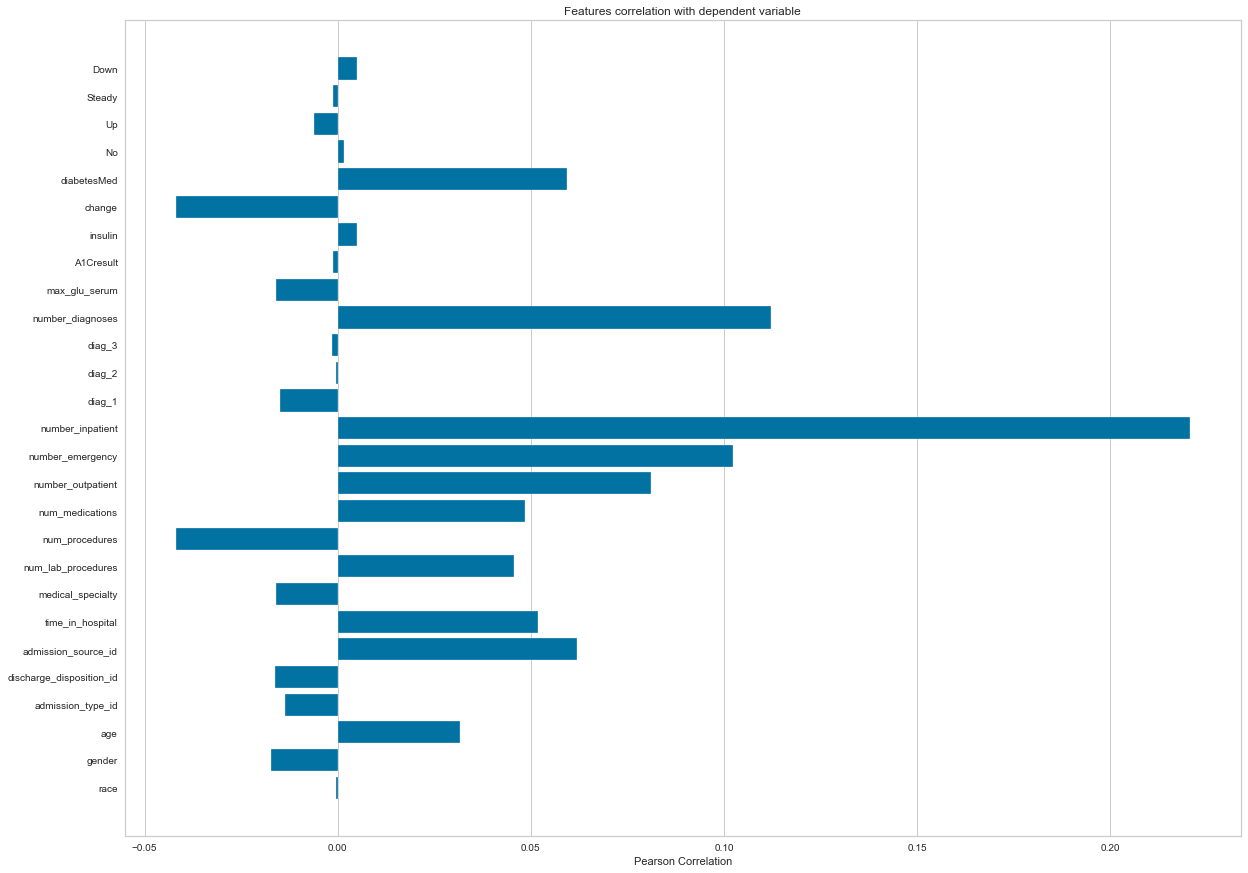

In [150]:
from yellowbrick.target import FeatureCorrelation
plt.figure(figsize=(20,15))
feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()
plt.show()

In [151]:
#race,A1C Result,Steady,diag_2,diag_3,insulin are giving least correlation

#### Multicollinearity Check

In [152]:
vif=pd.DataFrame()
vif['Columns']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif.sort_values(by='vif',ascending=False)

Columns         vif
23                        No  111.949383
25                    Steady    2.420937
10           num_medications    1.668899
21                    change    1.647456
22               diabetesMed    1.562180
6           time_in_hospital    1.427624
9             num_procedures    1.337405
8         num_lab_procedures    1.233132
17          number_diagnoses    1.213389
5        admission_source_id    1.135424
2                        age    1.129500
3          admission_type_id    1.127909
13          number_inpatient    1.122194
20                   insulin    1.100691
24                        Up    1.099507
12          number_emergency    1.099475
14                    diag_1    1.090463
26                      Down    1.065578
15                    diag_2    1.054959
0                       race    1.046096
7          medical_specialty    1.037422
16                    diag_3    1.036570
11         number_outpatient    1.032190
19                 A1Cresult    1.028212
4   discharge_disposition_id    1.027020
1                     gender    1.020668
18             max_glu_serum    1.020638

In [153]:
#no is having the max multicollinearity,so dropping no

In [154]:
#Building Model After correcting Multicollinearity

In [155]:
X1=X.drop(['No'],axis=1)
y1=y

In [156]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y1,train_size=0.75,random_state=1)

Rebuliding Models after doing Feature selection

In [157]:
pipe_ad1=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(n_estimators=100))
))
pipe_ad1.fit(xtrain1,ytrain1)
ypred_ad1=pipe_ad1.predict(xtest1)
ytpred_ad1=pipe_ad1.predict(xtrain1)
ad_score1=accuracy_score(ytest1,ypred_ad1)
ypredprob1=pipe_ad1.predict_proba(xtest1)
ypredprobt1=pipe_ad1.predict_proba(xtrain1)

In [158]:
print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain1,ytpred_ad1)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest1,ypred_ad1)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest1,ypredprob1[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain1,ypredprobt1[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytest1,ypred_ad1),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.51%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.87%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 67.24%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 67.08%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9671 3028]
 [5924 5487]]


In [159]:
pipe_xgb1=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('xgb',XGBClassifier())
))
pipe_xgb1.fit(xtrain1,ytrain1)
ypred_xgb1=pipe_xgb1.predict(xtest1)
ytpred_xgb1=pipe_xgb1.predict(xtrain1)
xgb_score1=accuracy_score(ytest1,ypred_xgb1)
ypredprob1=pipe_xgb1.predict_proba(xtest1)
ypredprobt1=pipe_xgb1.predict_proba(xtrain1)

[20:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [160]:
print('Accuracy score for Training set of XGBClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain1,ytpred_xgb1)*100))
print('Accuracy score for Test set of XGBClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest1,ypred_xgb1)*100))
print('Roc_Auc score for Test set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest1,ypredprob1[:,1])*100))
print('Roc_Auc score for Train set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain1,ypredprobt1[:,1])*100))
print('Confusion Matrix for Test set of XGBClassifier Model is :',confusion_matrix(ytest1,ypred_xgb1),sep='\n')

Accuracy score for Training set of XGBClassifier Model is :70.01%
Accuracy score for Test set of XGBClassifier Model is : 62.98%
Roc_Auc score for Test set of XGBClassifier Model is : 67.59%
Roc_Auc score for Train set of XGBClassifier Model is : 77.39%
Confusion Matrix for Test set of XGBClassifier Model is :
[[8898 3801]
 [5124 6287]]


In [161]:
pipe_gb1=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier())
))
pipe_gb1.fit(xtrain1,ytrain1)
ypred_gb1=pipe_gb1.predict(xtest1)
ytpred_gb1=pipe_gb1.predict(xtrain1)
gb_score1=accuracy_score(ytest1,ypred_gb1)
ypredprob1=pipe_gb1.predict_proba(xtest1)
ypredprobt1=pipe_gb1.predict_proba(xtrain1)

print('Accuracy score for Training set of GBClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain1,ytpred_gb1)*100))
print('Accuracy score for Test set of GBClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest1,ypred_gb1)*100))
print('Roc_Auc score for Test set of GBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest1,ypredprob1[:,1])*100))
print('Roc_Auc score for Train set of GBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain1,ypredprobt1[:,1])*100))
print('Confusion Matrix for Test set of GBClassifier Model is :',confusion_matrix(ytest1,ypred_gb1),sep='\n')

Accuracy score for Training set of GBClassifier Model is :62.83%
Accuracy score for Test set of GBClassifier Model is : 63.30%
Roc_Auc score for Test set of GBClassifier Model is : 68.00%
Roc_Auc score for Train set of GBClassifier Model is : 68.12%
Confusion Matrix for Test set of GBClassifier Model is :
[[9604 3095]
 [5753 5658]]


In [162]:
ada_df['After Feature Selection']=ad_score1
ada_df

Model  Base Model Score  After Feature Selection
0  AdaBoostClassifier          0.624181                 0.628702

In [163]:
gb_df['After Feature Selection']=gb_score1
gb_df

Model  Base Model Score  After Feature Selection
0  GradientBoostClassifier          0.624181                 0.633015

In [164]:
#Eliminating More Features Again

In [165]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.drop('No',axis=1).corr(),annot=True)
plt.show()

In [166]:
vif=pd.DataFrame()
vif['Columns']=X1.columns
vif['vif']=[variance_inflation_factor(X1.values,i) for i in range(len(X1.columns))]
vif.sort_values(by='vif',ascending=False)

Columns        vif
18             max_glu_serum  26.801880
17          number_diagnoses  20.112839
2                        age  17.125795
19                 A1Cresult  12.999388
10           num_medications   8.277877
8         num_lab_procedures   6.897413
22               diabetesMed   6.504947
0                       race   4.880515
5        admission_source_id   4.560967
6           time_in_hospital   4.551896
20                   insulin   4.097740
7          medical_specialty   3.965133
21                    change   3.369275
3          admission_type_id   2.994022
14                    diag_1   2.369519
24                    Steady   2.294300
15                    diag_2   2.229211
9             num_procedures   2.158257
16                    diag_3   2.145347
1                     gender   1.874914
13          number_inpatient   1.409915
4   discharge_disposition_id   1.342082
12          number_emergency   1.149199
11         number_outpatient   1.121217
23                        Up   1.098126
25                      Down   1.062609

In [167]:
X2=X1.drop(['max_glu_serum'],axis=1)
y2=y

In [168]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X2,y2,train_size=0.75,random_state=1)

In [169]:
pipe_ad2=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(n_estimators=100))
))
pipe_ad2.fit(xtrain2,ytrain2)
ypred_ad2=pipe_ad2.predict(xtest2)
ytpred_ad2=pipe_ad2.predict(xtrain2)
ad_score2=accuracy_score(ytest2,ypred_ad2)
ypredprob2=pipe_ad2.predict_proba(xtest2)
ypredprobt2=pipe_ad2.predict_proba(xtrain2)

In [170]:
print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain2,ytpred_ad2)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest2,ypred_ad2)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest2,ypredprob2[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain2,ypredprobt2[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytest2,ypred_ad2),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.57%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.91%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 67.27%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 67.08%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9677 3022]
 [5920 5491]]


In [171]:
pipe_gb2=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier())
))
pipe_gb2.fit(xtrain2,ytrain2)
ypred_gb2=pipe_gb2.predict(xtest2)
ytpred_gb2=pipe_gb2.predict(xtrain2)
gb_score2=accuracy_score(ytest2,ypred_ad2)
ypredprob2=pipe_gb2.predict_proba(xtest2)
ypredprobt2=pipe_gb2.predict_proba(xtrain2)

print('Accuracy score for Training set of GradientBoostingClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain2,ytpred_gb2)*100))
print('Accuracy score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest2,ypred_gb2)*100))
print('Roc_Auc score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest2,ypredprob2[:,1])*100))
print('Roc_Auc score for Train set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain2,ypredprobt2[:,1])*100))
print('Confusion Matrix for Test set of GradientBoostingClassifier Model is :',confusion_matrix(ytest2,ypred_ad2),sep='\n')

Accuracy score for Training set of GradientBoostingClassifier Model is :62.88%
Accuracy score for Test set of GradientBoostingClassifier Model is : 63.22%
Roc_Auc score for Test set of GradientBoostingClassifier Model is : 67.97%
Roc_Auc score for Train set of GradientBoostingClassifier Model is : 68.11%
Confusion Matrix for Test set of GradientBoostingClassifier Model is :
[[9677 3022]
 [5920 5491]]


In [172]:
ada_df['Second Feature Selection']=ad_score2
ada_df

Model  Base Model Score  After Feature Selection  \
0  AdaBoostClassifier          0.624181                 0.628702   

   Second Feature Selection  
0                  0.629117

In [173]:
gb_df['Second Feature Selection']=gb_score2
gb_df

Model  Base Model Score  After Feature Selection  \
0  GradientBoostClassifier          0.624181                 0.633015   

   Second Feature Selection  
0                  0.629117

In [174]:
# Scaling the data and Building Model Again

In [175]:
Xa=X2
ya=df2['readmitted']

xtraina,xtesta,ytraina,ytesta=train_test_split(Xa,ya,train_size=0.75,random_state=1,stratify=ya)

In [176]:
l=['gender','max_glu_serum','A1Cresult','insulin','change','Up','Down','age']
ss=StandardScaler()
for i in xtraina.columns:
    if i not in l:
        xtraina[i]=ss.fit_transform(xtraina[[i]])
        xtesta[i]=ss.transform(xtesta[[i]])

In [177]:
pipe_ada=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(n_estimators=100))
))
pipe_ada.fit(xtraina,ytraina)
ypred_ada=pipe_ada.predict(xtesta)
ytpred_ada=pipe_ada.predict(xtraina)
ad_scorea=accuracy_score(ytesta,ypred_ada)
ypredproba=pipe_ada.predict_proba(xtesta)
ypredprobta=pipe_ada.predict_proba(xtraina)

In [178]:
print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytraina,ytpred_ada)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytesta,ypred_ada)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytesta,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytraina,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytesta,ypred_ada),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.65%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.48%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 66.98%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 67.14%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9482 3199]
 [5846 5583]]


In [179]:
pipe_xgba=Pipeline((
('ss',StandardScaler()),
('pt',PowerTransformer()),
('xgb',XGBClassifier())
))
pipe_xgba.fit(xtraina,ytraina)
ypred_xgba=pipe_ada.predict(xtesta)
ytpred_xgba=pipe_ada.predict(xtraina)
xgb_scorea=accuracy_score(ytesta,ypred_xgba)
ypredproba=pipe_xgba.predict_proba(xtesta)
ypredprobta=pipe_xgba.predict_proba(xtraina)

[20:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [180]:
print('Accuracy score for Training set of XGBClassifier Model is :{:0.2f}%'.format(accuracy_score(ytraina,ytpred_ada)*100))
print('Accuracy score for Test set of XGBClassifier Model is : {:0.2f}%'.format(accuracy_score(ytesta,ypred_ada)*100))
print('Roc_Auc score for Test set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytesta,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of XGBClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytraina,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of XGBClassifier Model is :',confusion_matrix(ytesta,ypred_ada),sep='\n')

Accuracy score for Training set of XGBClassifier Model is :62.65%
Accuracy score for Test set of XGBClassifier Model is : 62.48%
Roc_Auc score for Test set of XGBClassifier Model is : 67.28%
Roc_Auc score for Train set of XGBClassifier Model is : 76.76%
Confusion Matrix for Test set of XGBClassifier Model is :
[[9482 3199]
 [5846 5583]]


## Doing Cross-Validation For Selecting Model 

In [181]:
ada=AdaBoostClassifier()

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cross_ada=cross_val_score(estimator=ada,X=xtrain1,y=ytrain1,scoring='accuracy',cv=kfold,n_jobs=-1)

print(cross_ada)
print('mean value',cross_ada.mean())
print('std value',cross_ada.std())

[0.6184156  0.62657265 0.61509747 0.62850823 0.62214849 0.63030554
 0.60804645 0.62845686 0.62513827 0.62361726]
mean value 0.62263068176952
std value 0.0066154540048722794


In [182]:
gb=GradientBoostingClassifier()
kfold = KFold(n_splits=10, random_state=5,shuffle=True)
cross_gb=cross_val_score(estimator=gb,X=xtrain1,y=ytrain1,scoring='accuracy',cv=kfold,n_jobs=-1)
print(cross_gb)
print('mean value',cross_gb.mean())
print('std value',cross_gb.std())

[0.61689479 0.62588138 0.63085856 0.622425   0.63265588 0.62463708
 0.61703304 0.62472345 0.63274336 0.62403208]
mean value 0.6251884625866695
std value 0.0053875709488575155


In [183]:
xgb=XGBClassifier() 
kfold = KFold(n_splits=10, random_state=5,shuffle=True)
cross_xgb=cross_val_score(estimator=xgb,X=xtrain1,y=ytrain1,scoring='accuracy',cv=10,n_jobs=-1)
print(cross_xgb)
print('mean value',cross_xgb.mean())
print('std value',cross_xgb.std())

[0.63417669 0.63224112 0.6304438  0.62256325 0.62615789 0.62380755
 0.62187198 0.6147677  0.6255531  0.62029867]
mean value 0.6251881739177246
std value 0.005581393864831069


In [184]:
rf=RandomForestClassifier() 
kfold = KFold(n_splits=10, random_state=5,shuffle=True)
cross_rf=cross_val_score(estimator=rf,X=xtrain1,y=ytrain1,scoring='accuracy',cv=10,n_jobs=-1)
print(cross_rf)
print('mean value',cross_rf.mean())
print('std value',cross_rf.std())

[0.62657265 0.62201023 0.60998203 0.61412968 0.61495921 0.61274713
 0.61896862 0.61089602 0.62334071 0.61877765]
mean value 0.617238393673172
std value 0.005295383194895961


GradientBoosting has least std deviation and good mean score so selecting adaboost as our model 

### Grid Search

In [185]:
# ad=AdaBoostClassifier()
# param=[{'n_estimators':[10,100,500,1000],'learning_rate':[1,1.2,1.5,2]}]
# grid=GridSearchCV(estimator=ad,param_grid=param,scoring='accuracy',n_jobs=-1)
# grid.fit(xtrain1,ytrain1)

In [186]:
# grid.best_estimator_

In [187]:
# gb=GradientBoostingClassifier()

# param=[{'n_estimators':[10,100,500,1000],'learning_rate':[0.1,0.01,1,1.2,1.5,2]}]
# grid=GridSearchCV(estimator=gb,param_grid=param,scoring='accuracy',n_jobs=-1)
# grid.fit(xtrain1,ytrain1)

In [188]:
# grid.best_params_

In [189]:
pipe_adagrid=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(learning_rate=1, n_estimators=500))
))
pipe_adagrid.fit(xtraina,ytraina)
ypred_adagrid=pipe_adagrid.predict(xtesta)
ytpred_adagrid=pipe_adagrid.predict(xtraina)
ad_scorea=accuracy_score(ytesta,ypred_adagrid)
ypredproba=pipe_adagrid.predict_proba(xtesta)
ypredprobta=pipe_adagrid.predict_proba(xtraina)

print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytraina,ytpred_adagrid)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytesta,ypred_adagrid)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytesta,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytraina,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytesta,ypred_adagrid),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.89%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.37%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 67.04%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 67.49%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9425 3256]
 [5816 5613]]


In [190]:
pipe_gbgrid=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier(learning_rate=0.1, n_estimators=500))
))
pipe_gbgrid.fit(xtraina,ytraina)
ypred_gbgrid=pipe_adagrid.predict(xtesta)
ytpred_gbgrid=pipe_adagrid.predict(xtraina)
gb_scorea=accuracy_score(ytesta,ypred_gbgrid)
ypredproba=pipe_gbgrid.predict_proba(xtesta)
ypredprobta=pipe_gbgrid.predict_proba(xtraina)

print('Accuracy score for Training set of GradientBoostingClassifier Model is :{:0.2f}%'.format(accuracy_score(ytraina,ytpred_gbgrid)*100))
print('Accuracy score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(accuracy_score(ytesta,ypred_gbgrid)*100))
print('Roc_Auc score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytesta,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytraina,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of GradientBoostingClassifier Model is :',confusion_matrix(ytesta,ypred_gbgrid),sep='\n')

Accuracy score for Training set of GradientBoostingClassifier Model is :62.89%
Accuracy score for Test set of GradientBoostingClassifier Model is : 62.37%
Roc_Auc score for Test set of GradientBoostingClassifier Model is : 68.18%
Roc_Auc score for Train set of GradientBoostingClassifier Model is : 70.46%
Confusion Matrix for Test set of GradientBoostingClassifier Model is :
[[9425 3256]
 [5816 5613]]


In [191]:
ada_df['After Grid Search']=ad_scorea

In [192]:
ada_df

Model  Base Model Score  After Feature Selection  \
0  AdaBoostClassifier          0.624181                 0.628702   

   Second Feature Selection  After Grid Search  
0                  0.629117           0.623725

In [193]:
gb_df['After Grid Search']=gb_scorea
gb_df

Model  Base Model Score  After Feature Selection  \
0  GradientBoostClassifier          0.624181                 0.633015   

   Second Feature Selection  After Grid Search  
0                  0.629117           0.623725

### Recursive Feature Extraction Method

In [194]:
# ad=AdaBoostClassifier()
# rfecv = RFECV(estimator=ad, scoring='accuracy')
# rfecv.fit(X1, y1)

In [195]:
# rfecv.support_

In [196]:
X1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed', 'Up',
       'Steady', 'Down'],
      dtype='object')

In [197]:
# gb=GradientBoostingClassifier()
# rfecv = RFECV(estimator=gb, scoring='accuracy')
# rfecv.fit(X1, y1)

In [198]:
# rfecv.support_

In [199]:
X11=X1[['age','discharge_disposition_id','admission_source_id', 'num_procedures','num_medications', 'number_emergency','number_inpatient','diag_1','diag_2', 'diag_3','number_diagnoses','A1Cresult','insulin']]
y11=df2['readmitted']

In [200]:
xtrain1a,xtest1a,ytrain1a,ytest1a=train_test_split(X11,y11,train_size=0.75,random_state=1,stratify=ya)

In [201]:
pipe_adagrid=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(learning_rate=1, n_estimators=500))
))
pipe_adagrid.fit(xtrain1a,ytrain1a)
ypred_adagrid=pipe_adagrid.predict(xtest1a)
ytpred_adagrid=pipe_adagrid.predict(xtrain1a)
ad_scorea=accuracy_score(ytesta,ypred_adagrid)
ypredproba=pipe_adagrid.predict_proba(xtest1a)
ypredprobta=pipe_adagrid.predict_proba(xtrain1a)

print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain1a,ytpred_adagrid)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest1a,ypred_adagrid)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest1a,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain1a,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytest1a,ypred_adagrid),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :62.16%
Accuracy score for Test set of AdaBoostClassifier Model is : 62.26%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 66.57%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 66.61%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9634 3047]
 [6052 5377]]


In [202]:
X11a=X1[['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'diabetesMed']]
y11a=df2['readmitted']
xtrain1aa,xtest1aa,ytrain1aa,ytest1aa=train_test_split(X11a,y11a,train_size=0.75,random_state=1,stratify=ya)

In [203]:
pipe_gbgrid=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier(learning_rate=0.1, n_estimators=500))
))
pipe_gbgrid.fit(xtrain1aa,ytrain1aa)
ypred_gbgrid=pipe_gbgrid.predict(xtest1aa)
ytpred_gbgrid=pipe_gbgrid.predict(xtrain1aa)
gb_scorea=accuracy_score(ytest1aa,ypred_gbgrid)
ypredproba=pipe_gbgrid.predict_proba(xtest1aa)
ypredprobta=pipe_gbgrid.predict_proba(xtrain1aa)

print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrain1aa,ytpred_gbgrid)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytest1aa,ypred_gbgrid)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytest1aa,ypredproba[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrain1aa,ypredprobta[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytest1aa,ypred_gbgrid),sep='\n')

Accuracy score for Training set of AdaBoostClassifier Model is :64.31%
Accuracy score for Test set of AdaBoostClassifier Model is : 63.09%
Roc_Auc score for Test set of AdaBoostClassifier Model is : 67.87%
Roc_Auc score for Train set of AdaBoostClassifier Model is : 69.79%
Confusion Matrix for Test set of AdaBoostClassifier Model is :
[[9133 3548]
 [5352 6077]]


In [204]:
ada_df['RFE Method']=ad_scorea

In [205]:
gb_df['RFE Method']=gb_scorea

## Sequential Feature Selection Method

In [206]:
# for i in range(10,len(xtrain1.columns)):
#     sfs=SequentialFeatureSelector(estimator=xgb,k_features=i,forward=True,cv=10,n_jobs=-1)
#     sfs.fit(xtest1,ytest1)
#     print(i,sfs.k_score_)

In [207]:
# for i in range(10,len(xtrain1.columns)):
#     sfs=SequentialFeatureSelector(estimator=ad,k_features=i,forward=True,cv=10,n_jobs=-1)
#     sfs.fit(xtest1,ytest1)
#     print(i,sfs.k_score_)

In [ ]:
sfs=SequentialFeatureSelector(estimator=ad,k_features=21,forward=True,cv=10,n_jobs=-1)
sfs.fit(xtest1,ytest1)
print(sfs.k_score_)

In [ ]:
sfs.k_feature_names_

In [ ]:
for i in range(10,len(xtrain1.columns)):
    sfs1=SequentialFeatureSelector(estimator=gb,k_features=i,forward=True,cv=10,n_jobs=-1)
    sfs1.fit(xtest1,ytest1)
    print(i,sfs1.k_score_)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

10 0
11 0.6306511820821237
12 0.6301534632932394


In [ ]:
X_sfs=df1[list(sfs.k_feature_names_)]
y_sfs=df1['readmitted']

In [ ]:
#label encoding
for i in X_sfs.select_dtypes(include='O'):
    X_sfs[i]=le.fit_transform(X_sfs[i])
y_sfs=le.fit_transform(y_sfs)

In [ ]:
xtrainsfs,xtestsfs,ytrainsfs,ytestsfs=train_test_split(X_sfs,y_sfs,train_size=0.75,random_state=1,stratify=y_sfs)

In [ ]:
pipe_ada_sfs=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(learning_rate=1, n_estimators=500))
))
pipe_ada_sfs.fit(xtrainsfs,ytrainsfs)
ypred_adasfs=pipe_ada_sfs.predict(xtestsfs)
ytpred_adasfs=pipe_ada_sfs.predict(xtrainsfs)
ad_score_sfs=accuracy_score(ytestpca,ypred_adasfs)
ypredproba_sfs=pipe_ada_sfs.predict_proba(xtestsfs)
ypredprobta_sfs=pipe_ada_sfs.predict_proba(xtrainsfs)

print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrainsfs,ytpred_adasfs)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytestsfs,ypred_adasfs)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytestsfs,ypredproba_sfs[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrainsfs,ypredprobta_sfs[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytestsfs,ypred_adasfs),sep='\n')

In [ ]:
ada_df['SFS Method']=ad_score_sfs

## Clustering Method

In [ ]:
sns.clustermap(df1.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1).corr(),method='complete',annot=True,figsize=(15,10),cmap='viridis',row_cluster=False,standard_scale=1)
plt.show()

In [ ]:
x_pca=df1[['num_medications','time_in_hospital','num_lab_procedures', 'num_procedures', 'number_diagnoses']]

In [ ]:
x_pcas=ss.fit_transform(x_pca)

In [ ]:
x_pcas=pd.DataFrame(x_pcas,columns=x_pca.columns)

In [ ]:
pca=PCA(0.90)
pca_df=pca.fit_transform(x_pcas)

In [ ]:
pca1=pd.DataFrame(pca_df)
pca1.head()

In [ ]:
pd.DataFrame(pca.components_,columns=x_pca.columns,index=['PC1','PC2','PC3','PC4'])

In [ ]:
#PC1 determines Total number of meds taken during stay at hospital
#PC2 determines total numbers of tests including procedures and diagonesis taken
#PC3 determines just the lab procedures and diagones
#PC4 determine total number of lab procedures done during whole stay at hospital

In [ ]:
dfp=df1.drop(['num_medications','time_in_hospital','num_lab_procedures', 'num_procedures', 'number_diagnoses','patient_nbr','encounter_id'],axis=1)

In [ ]:
dfp_new=pd.concat([dfp,pca1],axis=1)

In [ ]:
#label encoding
for i in dfp.select_dtypes(include='O'):
    dfp[i]=le.fit_transform(dfp[i])

In [ ]:
X_pca=dfp.drop('readmitted',axis=1)
y_pca=dfp['readmitted']

In [ ]:
xtrainpca,xtestpca,ytrainpca,ytestpca=train_test_split(X_pca,y_pca,train_size=0.75,random_state=1,stratify=y_pca)

In [ ]:
pipe_ada_pca=Pipeline((
('pt',PowerTransformer()),
('ad',AdaBoostClassifier(learning_rate=1, n_estimators=500))
))
pipe_ada_pca.fit(xtrainpca,ytrainpca)
ypred_adapca=pipe_ada_pca.predict(xtestpca)
ytpred_adapca=pipe_ada_pca.predict(xtrainpca)
ad_score_pca=accuracy_score(ytestpca,ypred_adapca)
ypredproba_pca=pipe_ada_pca.predict_proba(xtestpca)
ypredprobta_pca=pipe_ada_pca.predict_proba(xtrainpca)

print('Accuracy score for Training set of AdaBoostClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrainpca,ytpred_adapca)*100))
print('Accuracy score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(accuracy_score(ytestpca,ypred_adapca)*100))
print('Roc_Auc score for Test set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytestpca,ypredproba_pca[:,1])*100))
print('Roc_Auc score for Train set of AdaBoostClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrainpca,ypredprobta_pca[:,1])*100))
print('Confusion Matrix for Test set of AdaBoostClassifier Model is :',confusion_matrix(ytestpca,ypred_adapca),sep='\n')

In [ ]:
pipe_gb_pca=Pipeline((
('pt',PowerTransformer()),
('gb',GradientBoostingClassifier(learning_rate=0.1, n_estimators=500))
))
pipe_gb_pca.fit(xtrainpca,ytrainpca)
ypred_gbpca=pipe_gb_pca.predict(xtestpca)
ytpred_gbpca=pipe_gb_pca.predict(xtrainpca)
gb_score_pca=accuracy_score(ytestpca,ypred_gbpca)
ypredproba_pca=pipe_gb_pca.predict_proba(xtestpca)
ypredprobta_pca=pipe_gb_pca.predict_proba(xtrainpca)

print('Accuracy score for Training set of GradientBoostingClassifier Model is :{:0.2f}%'.format(accuracy_score(ytrainpca,ytpred_gbpca)*100))
print('Accuracy score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(accuracy_score(ytestpca,ypred_gbpca)*100))
print('Roc_Auc score for Test set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytestpca,ypredproba_pca[:,1])*100))
print('Roc_Auc score for Train set of GradientBoostingClassifier Model is : {:0.2f}%'.format(roc_auc_score(ytrainpca,ypredprobta_pca[:,1])*100))
print('Confusion Matrix for Test set of GradientBoostingClassifier Model is :',confusion_matrix(ytestpca,ypred_gbpca),sep='\n')

In [ ]:
x_pca2=df1[['number_inpatient','number_emergency','number_outpatient']]
x_pcas2=ss.fit_transform(x_pca2)

x_pcas2=pd.DataFrame(x_pcas2,columns=x_pca2.columns)

pca2=PCA(0.80)
len(pca.components_)

In [ ]:
#since for 80 percent of varience also there is no reduction in components is happenning so we need not to do in this cluster

In [ ]:
ada_df['Clustering Method']=ad_score_pca

In [ ]:
gb_df['Clustering Method']=gb_score_pca

In [ ]:
gb_df

In [ ]:
ada_df